In [1]:
from matplotlib import pyplot as plt
import netCDF4
import os
import numpy as np
import pandas as pd
import scipy

In [2]:
from scipy.stats import norm

In [3]:
from scipy.stats import weibull_min

In [4]:
%matplotlib nbagg

In [5]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [6]:
# list of all the datafiles used

files = os.listdir()
print(files)

# filter our all the nc files
ncfiles = []
for i, file in enumerate(files):
    if (file[-3:] == ".nc"):
        ncfiles.append(file)
ncfiles

['.ipynb_checkpoints', 'BOH_koeffisienter.py', 'DWR3c_3h.hdf5', 'erics_work_replication.ipynb', 'fig', 'jungao scripts', 'Langanuen-backup_160719.ipynb', 'Langanuen-Copy1.ipynb', 'Langanuen_with_contours.ipynb', 'lit', 'NORA10_6006N_0469E.hdf5', 'scripts', 'Stuart Coles - An Introduction to Statistical Modeling of Extreme Values (2001, Springer).pdf', 'swan_BF150_2002_HsTpMdir.nc', 'swan_BF150_2003_HsTpMdir.nc', 'swan_BF150_2004_HsTpMdir.nc', 'swan_BF150_2005_HsTpMdir.nc', 'swan_BF150_2006_HsTpMdir.nc', 'swan_BF150_2007_HsTpMdir.nc', 'swan_BF150_2008_HsTpMdir.nc', 'swan_BF150_2009_HsTpMdir.nc', 'swan_BF150_2010_HsTpMdir.nc', 'swan_BF150_2011_HsTpMdir.nc', 'swan_BF150_2012_HsTpMdir.nc', 'swan_BF150_2013_HsTpMdir.nc', 'swan_BF150_2014_HsTpMdir.nc', 'swan_BF150_2015_HsTpMdir.nc', 'swan_BF150_2016_HsTpMdir.nc', 'swan_BF150_2017_HsTpMdir.nc', 'test1-Copy1.ipynb', 'test1.ipynb', 'tide_data-Copy2.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


['swan_BF150_2002_HsTpMdir.nc',
 'swan_BF150_2003_HsTpMdir.nc',
 'swan_BF150_2004_HsTpMdir.nc',
 'swan_BF150_2005_HsTpMdir.nc',
 'swan_BF150_2006_HsTpMdir.nc',
 'swan_BF150_2007_HsTpMdir.nc',
 'swan_BF150_2008_HsTpMdir.nc',
 'swan_BF150_2009_HsTpMdir.nc',
 'swan_BF150_2010_HsTpMdir.nc',
 'swan_BF150_2011_HsTpMdir.nc',
 'swan_BF150_2012_HsTpMdir.nc',
 'swan_BF150_2013_HsTpMdir.nc',
 'swan_BF150_2014_HsTpMdir.nc',
 'swan_BF150_2015_HsTpMdir.nc',
 'swan_BF150_2016_HsTpMdir.nc',
 'swan_BF150_2017_HsTpMdir.nc']

In [7]:
# the data is presented for Hs, Tp and wave direction on a grid
fp = ncfiles[0]
nc = netCDF4.Dataset(fp)
nc.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (373,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (296,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  standard_name: time
                  long_name: time
                  units: seconds si

In [8]:
# span of latitudes
'min latitude: ', min(nc['latitude']).data, 'max latitude: ', max(
    nc['latitude']).data

('min latitude: ',
 array(59.85, dtype=float32),
 'max latitude: ',
 array(60.24825, dtype=float32))

In [9]:
# span of longitude
'min longitude: ', min(nc['longitude']).data, 'min longitude: ', max(
    nc['longitude']).data

('min longitude: ',
 array(4.8, dtype=float32),
 'min longitude: ',
 array(5.7969604, dtype=float32))

In [10]:
#location of crossings (latitude, longitude), taken from metocean spec Langanuen

CROSSING_SOUTH = (59.8925, 5.5264)
CROSSING_MID = (59.9362,5.4697)

In [11]:
#find the index of the grid point for the data

#south crossing
lat_index_south = np.where(nc['latitude'][:] >= CROSSING_SOUTH[0])[0][0]
lon_index_south = np.where(nc['longitude'][:] >= CROSSING_SOUTH[1])[0][0]
grid_coordinate_south = nc['latitude'][lat_index_south], nc['longitude'][lon_index_south]
print ('Indexs for south crossing:', lat_index_south, lon_index_south)
print ('Coordinate of south crossing grid points:({:.4f}N, {:.4f}E) '
       .format(grid_coordinate_south[0],grid_coordinate_south[1]))

#mid crossing
lat_index_mid = np.where(nc['latitude'][:] >= CROSSING_MID[0])[0][0]
lon_index_mid = np.where(nc['longitude'][:] >= CROSSING_MID[1])[0][0]
grid_coordinate_mid = nc['latitude'][lat_index_mid], nc['longitude'][lon_index_mid]
print ('Indexs for south crossing:', lat_index_mid, lon_index_mid)
print ('Coordinate of south crossing grid points:({:.4f}N, {:.4f}E)'
       .format(grid_coordinate_mid[0], grid_coordinate_mid[1]))

Indexs for south crossing: 32 272
Coordinate of south crossing grid points:(59.8932N, 5.5290E) 
Indexs for south crossing: 64 250
Coordinate of south crossing grid points:(59.9364N, 5.4700E)


In [12]:
def makedataframe(data, headers=['time', 'Hs', 'Tp', 'Wdir']):
    '''
    creates dataframe with the headers and data
    '''
    data_dict ={header: column for header, column in zip(headers, data)}
    df = pd.DataFrame(data_dict).set_index('time')
    
    return(df)
    

In [13]:
# Hs, Tp and wave direction are in the form of a 3 dimentional matrix Hs[time, latitude, longitude]

#describe an array: mean, standard deviation and array length
def desc(name, a, unit):
    print('{0}:: mean={1:.2f}{4}, std:{2:.2f}{4}, length: {3}'.format(name, np.mean(a), np.std(a), len(a), unit))
    


df_array_south = []
df_array_mid = []

for file in ncfiles:
    yearly_dataset = netCDF4.Dataset(file)
    year = int(file[11:15])
    
    #time data
    t = yearly_dataset['time']
    print('number of time points:', len(t))
    
    #check if we are extracting values at the correct grid point
    gc_south = yearly_dataset['latitude'][lat_index_south], nc['longitude'][lon_index_south]
    assert gc_south==grid_coordinate_south 
    
    #read data for south crossing 
    hs_south =  yearly_dataset['hs'][: , lat_index_south, lon_index_south]
    tp_south =  yearly_dataset['tps'][: , lat_index_south, lon_index_south]
    wdir_south = yearly_dataset['theta0'][: , lat_index_south, lon_index_south]
    print('South: ', year)
    desc('Hs', hs_south, 'm')
    desc('Tp', tp_south, 's')
    desc('Wave direction', wdir_south, '°')
    print('-'*80)
    df = makedataframe([t, hs_south, tp_south, wdir_south])
    df_array_south.append(df)
    
    
    gc_mid = yearly_dataset['latitude'][lat_index_mid], nc['longitude'][lon_index_mid]
    assert gc_mid == grid_coordinate_mid
    
    #read data for mid crossing 
    hs_mid =  yearly_dataset['hs'][: , lat_index_mid, lon_index_mid]
    tp_mid =  yearly_dataset['tps'][: , lat_index_mid, lon_index_mid]
    wdir_mid = yearly_dataset['theta0'][: , lat_index_mid, lon_index_mid]
    print('Middle crossing: ', year)
    desc('Hs', hs_mid, 'm')
    desc('Tp', tp_mid, 's')
    desc('Wave direction', wdir_mid, '°')
    print('='*80)
    df = makedataframe([t, hs_mid, tp_mid, wdir_mid])
    df_array_mid.append(df)

number of time points: 8760
South:  2002
Hs:: mean=0.13m, std:0.08m, length: 8760
Tp:: mean=1.54s, std:0.30s, length: 8760
Wave direction:: mean=214.36°, std:77.72°, length: 8760
--------------------------------------------------------------------------------
Middle crossing:  2002
Hs:: mean=0.15m, std:0.10m, length: 8760
Tp:: mean=1.64s, std:0.40s, length: 8760
Wave direction:: mean=185.16°, std:75.21°, length: 8760
number of time points: 8760
South:  2003
Hs:: mean=0.14m, std:0.10m, length: 8760
Tp:: mean=1.57s, std:0.35s, length: 8760
Wave direction:: mean=215.12°, std:76.13°, length: 8760
--------------------------------------------------------------------------------
Middle crossing:  2003
Hs:: mean=0.15m, std:0.11m, length: 8760
Tp:: mean=1.65s, std:0.43s, length: 8760
Wave direction:: mean=193.89°, std:76.85°, length: 8760
number of time points: 8784
South:  2004
Hs:: mean=0.14m, std:0.10m, length: 8784
Tp:: mean=1.60s, std:0.37s, length: 8784
Wave direction:: mean=224.48°, std:

In [14]:
df_south = pd.DataFrame()
df_mid = pd.DataFrame()

# assemble all the dataframe.
df_south = pd.concat(df_array_south)
df_mid = pd.concat(df_array_mid)
display('df_south.head()', 'df_mid.head()')

df_south.head()
                    Hs        Tp        Wdir
time                                        
1.009843e+09  0.020599       NaN  109.569992
1.009847e+09  0.023651       NaN  156.329239
1.009850e+09  0.017548       NaN  146.045715
1.009854e+09  0.032045  1.304667  139.920654
1.009858e+09  0.066378  1.089510  326.100647

df_mid.head()
                    Hs        Tp        Wdir
time                                        
1.009843e+09  0.041964  1.960814   56.526382
1.009847e+09  0.060274  1.328318  126.110413
1.009850e+09  0.075533  1.665548  127.730949
1.009854e+09  0.048067  1.430555  132.966095
1.009858e+09  0.170904  1.763206  306.396057

In [15]:
# check if all time series have been taken into account.

len(df_mid), len(df_south), 4344 + 4*8784 + 8760*10 + 7296

(134376, 134376, 134376)

In [16]:
# make index human-readable.
df_south.index = pd.to_datetime(df_south.index, unit='s')
df_mid.index = pd.to_datetime(df_mid.index, unit='s')
display('df_south.head()', 'df_mid.head()')

df_south.head()
                           Hs        Tp        Wdir
time                                               
2002-01-01 00:00:00  0.020599       NaN  109.569992
2002-01-01 01:00:00  0.023651       NaN  156.329239
2002-01-01 02:00:00  0.017548       NaN  146.045715
2002-01-01 03:00:00  0.032045  1.304667  139.920654
2002-01-01 04:00:00  0.066378  1.089510  326.100647

df_mid.head()
                           Hs        Tp        Wdir
time                                               
2002-01-01 00:00:00  0.041964  1.960814   56.526382
2002-01-01 01:00:00  0.060274  1.328318  126.110413
2002-01-01 02:00:00  0.075533  1.665548  127.730949
2002-01-01 03:00:00  0.048067  1.430555  132.966095
2002-01-01 04:00:00  0.170904  1.763206  306.396057

In [17]:
display('df_south.describe()', 'df_mid.describe()')

df_south.describe()
                  Hs             Tp           Wdir
count  134376.000000  134020.000000  134376.000000
mean        0.138890       1.596321     221.300262
std         0.102054       0.382151      79.430862
min         0.000000       1.049074       0.076904
25%         0.066378       1.338999     162.437820
50%         0.104527       1.438185     171.210663
75%         0.183111       1.771599     327.567383
max         0.917845      17.308573     359.983521

df_mid.describe()
                  Hs             Tp           Wdir
count  134376.000000  133911.000000  134376.000000
mean        0.156689       1.684578     201.104462
std         0.114400       0.447746      81.013382
min         0.004578       1.047548       0.076904
25%         0.078585       1.343578     136.674088
50%         0.115971       1.491592     142.920013
75%         0.209051       1.953184     303.742798
max         1.068911      19.474625     359.802246

In [18]:
# investigate missing data in 2007

a = df_south['2007']

for month in range(1, 13):
    monthly_data = a[a.index.month == month]
    print ('month: {}, number of readings:{}, days:{}'.format(month, len(monthly_data), len(monthly_data)/24))

month: 1, number of readings:744, days:31.0
month: 2, number of readings:672, days:28.0
month: 3, number of readings:744, days:31.0
month: 4, number of readings:720, days:30.0
month: 5, number of readings:744, days:31.0
month: 6, number of readings:720, days:30.0
month: 7, number of readings:744, days:31.0
month: 8, number of readings:744, days:31.0
month: 9, number of readings:720, days:30.0
month: 10, number of readings:744, days:31.0
month: 11, number of readings:0, days:0.0
month: 12, number of readings:0, days:0.0


In [19]:
a = df_south['2017']

for month in range(1, 13):
    monthly_data = a[a.index.month == month]
    print('month: {}, number of readings:{}, days:{}'.format(
        month, len(monthly_data), len(monthly_data)/24))


month: 1, number of readings:744, days:31.0
month: 2, number of readings:672, days:28.0
month: 3, number of readings:744, days:31.0
month: 4, number of readings:720, days:30.0
month: 5, number of readings:744, days:31.0
month: 6, number of readings:720, days:30.0
month: 7, number of readings:0, days:0.0
month: 8, number of readings:0, days:0.0
month: 9, number of readings:0, days:0.0
month: 10, number of readings:0, days:0.0
month: 11, number of readings:0, days:0.0
month: 12, number of readings:0, days:0.0


The data for 2007 contains 7296 points, corresponding to 304 days. The data for 2007 is missing the data for the months of November and December.


Data in 2017 is only available for the first six months.


In [20]:
from scipy.special import gamma as gamma


def weib3pfit(x):
    mx = np.mean(x)
    varx = np.var(x)
    stdx = np.std(x)
    #print(varx - (np.std(x))**2)

    #g1 = (1/len(x)*sum((x-mx)**3))/(varx**(3/2))
    g1 = (1/len(x)*sum((x-mx)**3))/(stdx**(3))

    beta = 0.0001
    y1 = 0

    while (np.abs(y1-g1) > 0.00001) or np.isnan(y1):
        beta = beta + 0.000001
        y1 = (gamma(1+3/beta) - 3*gamma(1+1/beta)*gamma(1+2/beta) + 2 *
              (gamma(1+1/beta)**3)) / (gamma(1+2/beta) - gamma(1+1/beta)**2)**(3/2)

    alpha = np.sqrt(varx/(gamma(1+2/beta) -
                          gamma(1+1/beta)**2))
    lambd = mx-alpha*gamma(1+1/beta)

    return lambd, alpha, beta

In [21]:
def weibulEVC(hm_data, return_period=[1, 10, 50, 100, 10000.0], tag='South', N_obs=365*24):

    # probablity distribution curve parameters, lamda, alpha, beta.
    lambd, alpha, beta = weib3pfit(hm_data)

    # sample space of the max wave height. discretized to every mm
    # sample space for the probablity, Hm_ss
    # max limit of sample space, Hm_ss_max, set to 4times. Arbitarily.
    # This is set up to be able to estimate high enough return periods
    Hm_ss_max = (int(np.max(hm_data)*4*2)+1)/2
    # print(Hm_ss_max)
    Hm_ss = np.arange(0.01, Hm_ss_max, 0.001)

    # sample space for probabilty of occurance
    prob_ss = np.arange(len(hm_data))/len(hm_data)

    # cumulative probablity, F
    # an absolute value Hm_ss and lambda can be taken so as to ensure positive
    # value at low values of Hm_ss but this gives an unrealistically decreasing tail.
    #F = 1 - np.exp(-(np.abs(Hm_ss - lambd)/alpha)**beta)
    F = 1 - np.exp(-((Hm_ss - lambd)/alpha)**beta)

    '''
    uncomment to plot cumulative probablity against Hs sample space
    plt.close()
    plt.plot(Hm_ss, F)
    plt.show()
    '''

    #return_period = [1, 10, 50, 100, 10000.0] in years
    # number of observations in a period [month, yearly]
    # for a year N_obs = 365*24
    # probablitiy of exedance. what is the probablity of exceedence for 1, 10, 50yrs...
    return_prob = [1-1/(N_obs*ret_per) for ret_per in return_period]
    return_prob = np.array(return_prob)

    # Find the index where the exceedence probablity if exeeded.
    exceedance_index = [np.where(F > prob) for prob in return_prob]
    exceedance_index = [i[0][0] for i in exceedance_index]

    # Find exceedance values of Hs
    Hm_extremes = Hm_ss[exceedance_index]

    # plotting
    plt.figure('EVC_'+tag)
    plt.ioff
    # plot sorted log Hs vs log log probabilty space
    plt.plot(np.log(np.sort(hm_data)), np.log(-np.log(1-prob_ss)), '+b')
    # todo check if np.log(prob_ss) gives the same plot.
    # plot Hm sample space vs weibull curve
    plt.plot(np.log(Hm_ss), np.log(-np.log(1-F)), 'r', lw=2.0)

    # plot extreme values vs, return period
    for x, y in zip(Hm_extremes, return_prob):
        plt.plot(np.log(x), np.log(-np.log(1-y)), 'o')
    plt.grid(True)
    legend = ['Data', 'Weibull 3p']
    _leg = ['{}yr    Hm={}cm'.format(a, b) for a, b in zip(
        return_period, np.round(Hm_extremes*100, 2))]
    legend += _leg
    #plt.axis([-5, 2, -7, 4])
    plt.legend(legend)
    plt.title('Weibull 3p EVC {} ($α=${:.2f}, $β=${:.2f}, $λ=${:.2f})'.format(
        tag, alpha, beta, lambd))
    plt.xlabel('log(Wave height)', fontsize=10)
    plt.ylabel('$log(-log(Probablity))$', fontsize=10)
    ts = pd.to_datetime('now').strftime("%Y%m%d_%H%M%S")
    #plt.savefig('./fig/'+tag+ts+'.png', dpi=300)
    plt.show()
    plt.close()

In [22]:
# observed values of Hmax South crossing from files.
hm_data = df_south['Hs']
weibulEVC(hm_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


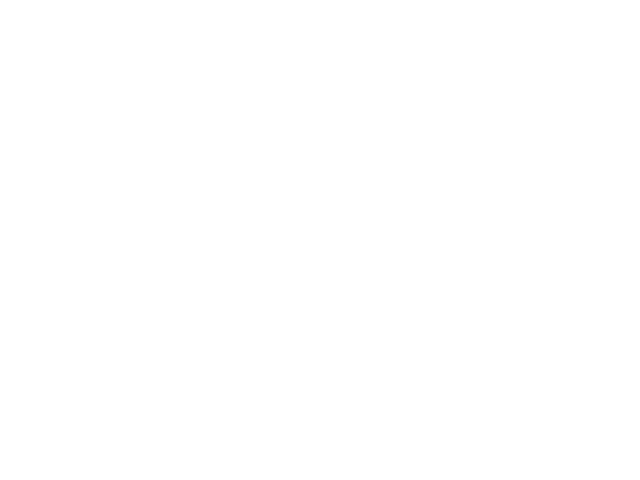

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


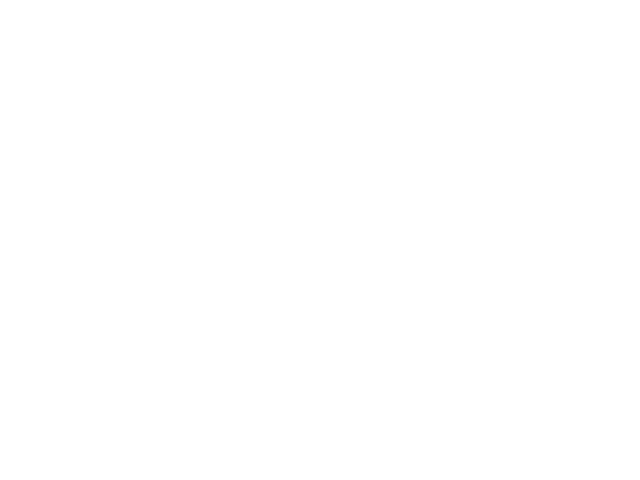

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


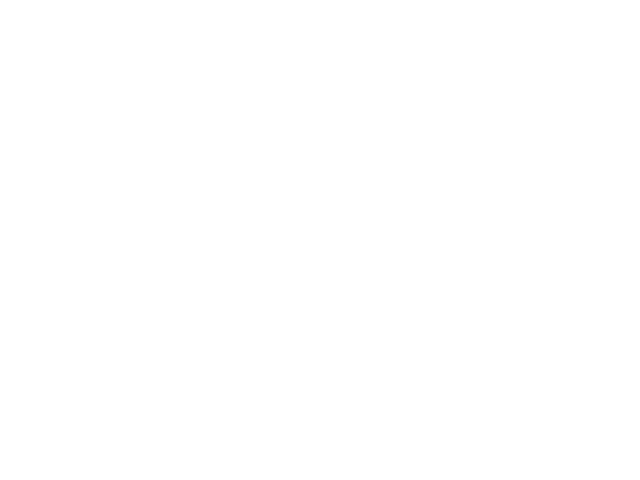

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


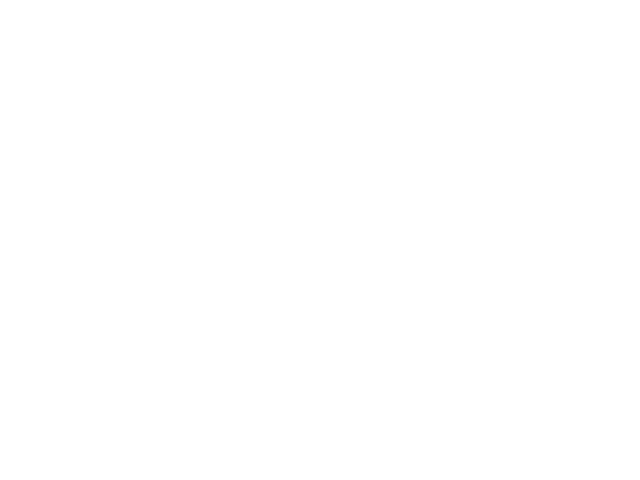

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


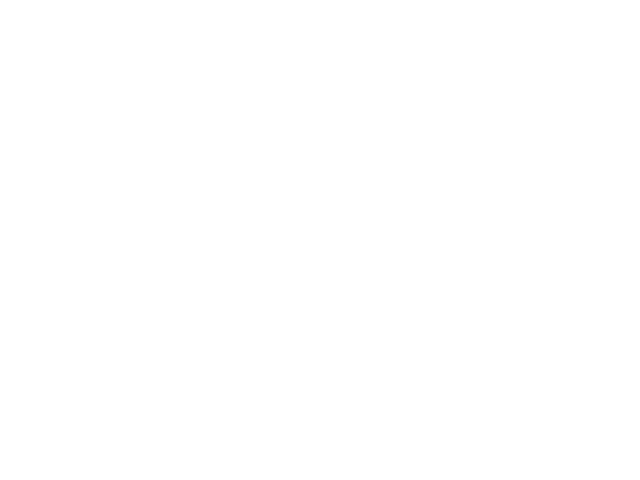

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


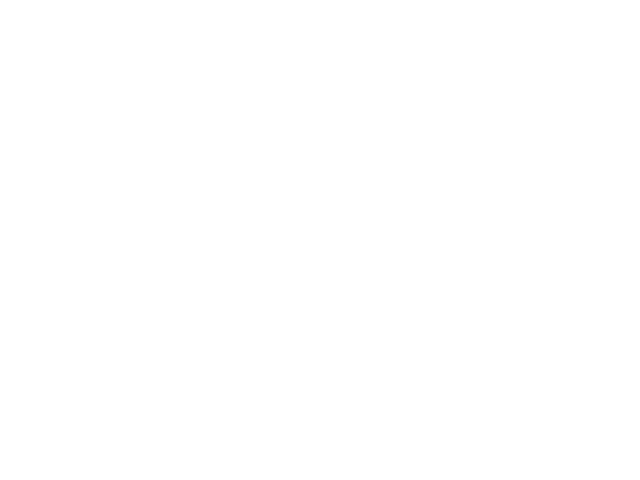

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


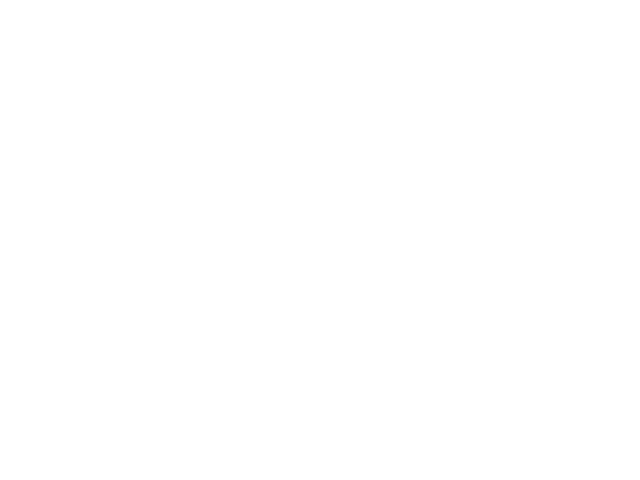

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


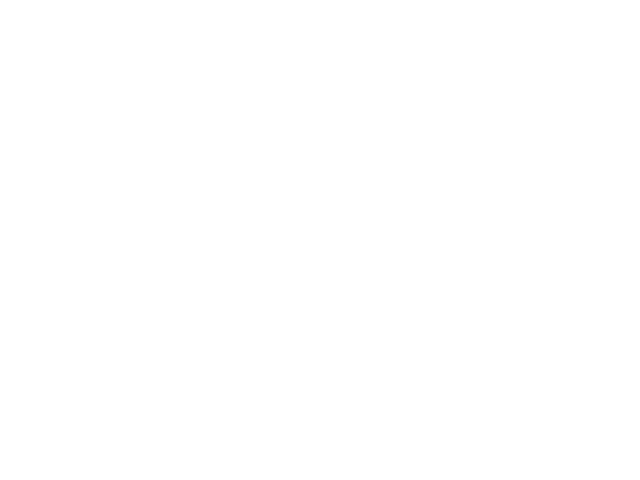

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


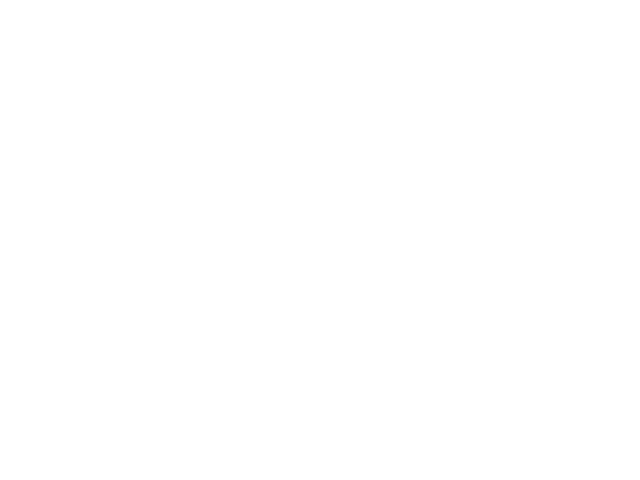

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


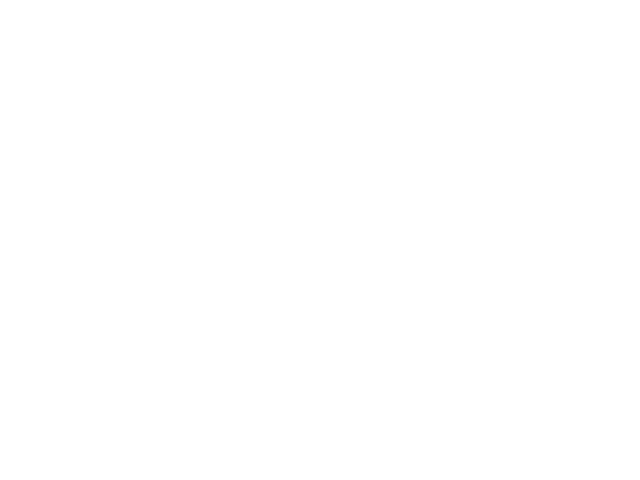

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


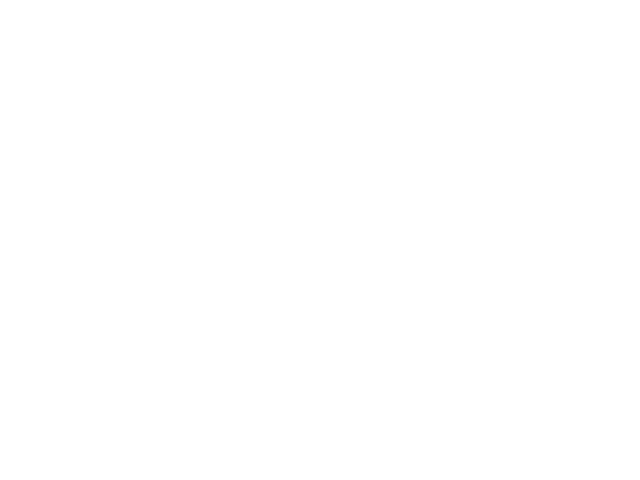

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


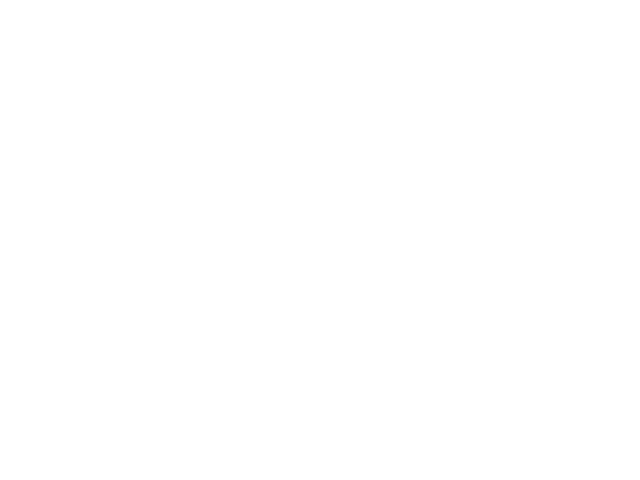

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


In [23]:
# do month wise
months = 'Jan Feb Mar Apr May Jun Jul Aug Sept Oct Nov Dec'.split(' ')
for month, m_name in enumerate(months):
    monthly_data = df_south[df_south.index.month == month+1]
    hm_data = monthly_data['Hs']
    weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='South_'+m_name, N_obs=30*24)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


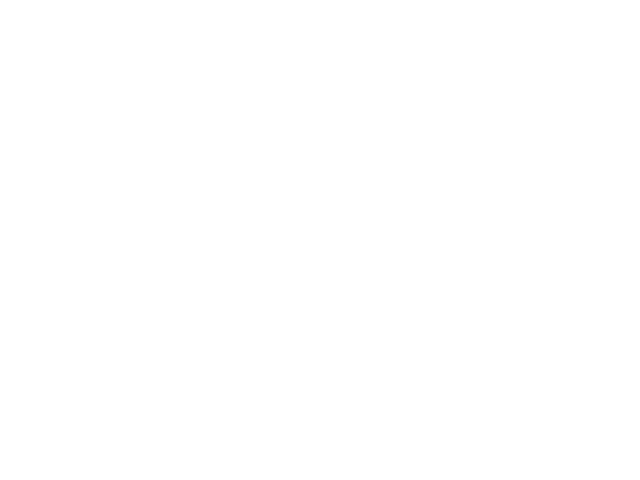

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


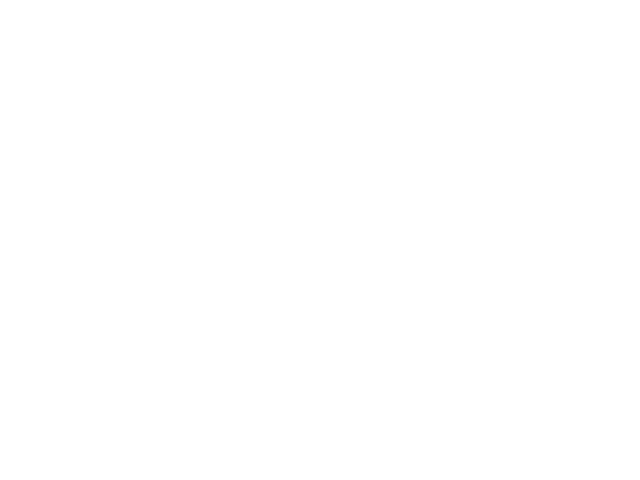

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


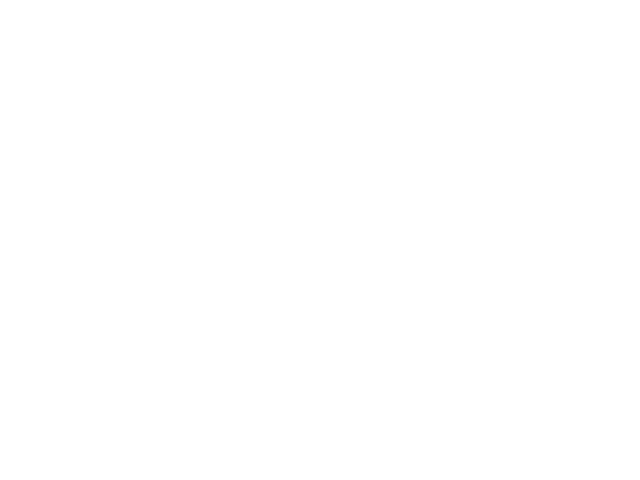

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


In [24]:
#do quarter wise south
#winter from november to february
monthly_data = df_south[(df_south.index.month>10 )|(df_south.index.month<3) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='South_Nov-Feb', N_obs=4*30*24)

#winter from march to jun
monthly_data = df_south[(df_south.index.month>2 )&(df_south.index.month<7) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='South_Mar-Jun', N_obs=4*30*24)

#winter from luly to october
monthly_data = df_south[(df_south.index.month>6 )|(df_south.index.month<11) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='South_Jul-Oct', N_obs=4*30*24)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


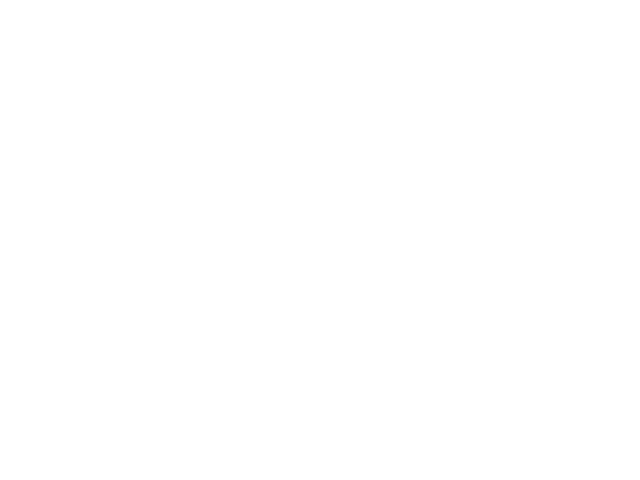

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


In [25]:
# observed values of Hmax mid crossing from files.
hm_data = df_mid['Hs']
weibulEVC(hm_data, return_period=[1, 10, 50, 100, 1000, 10000], tag='Mid')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


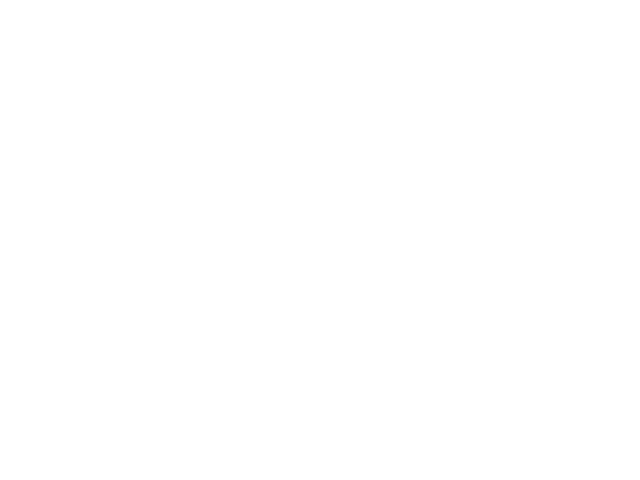

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


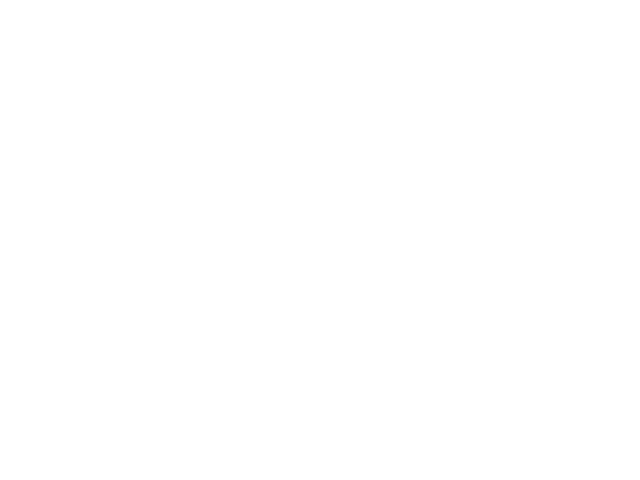

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


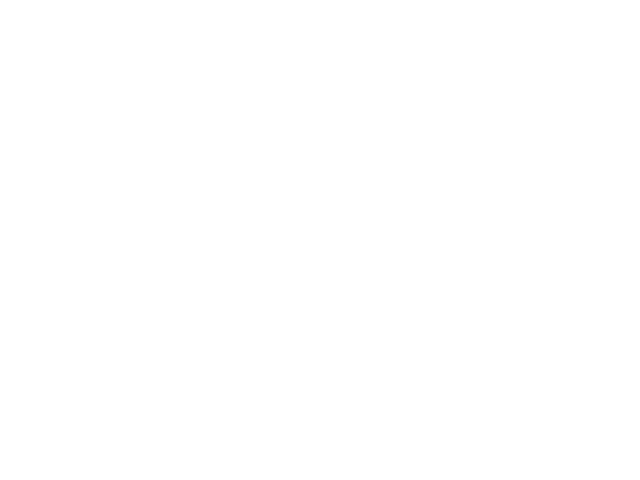

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


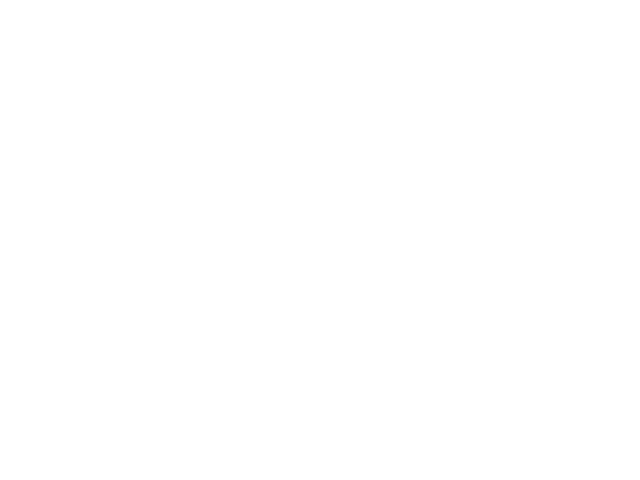

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


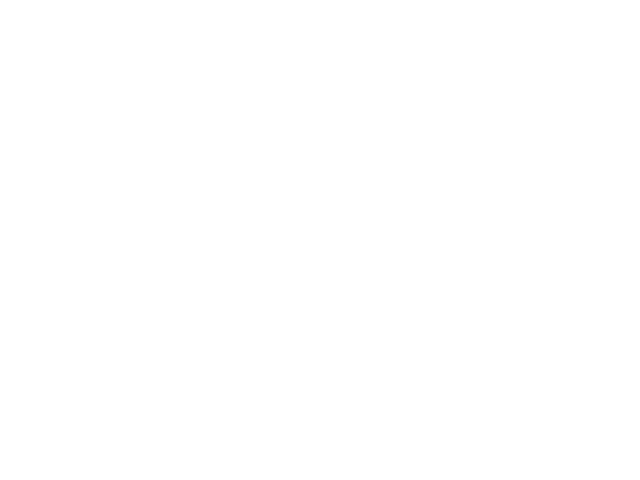

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


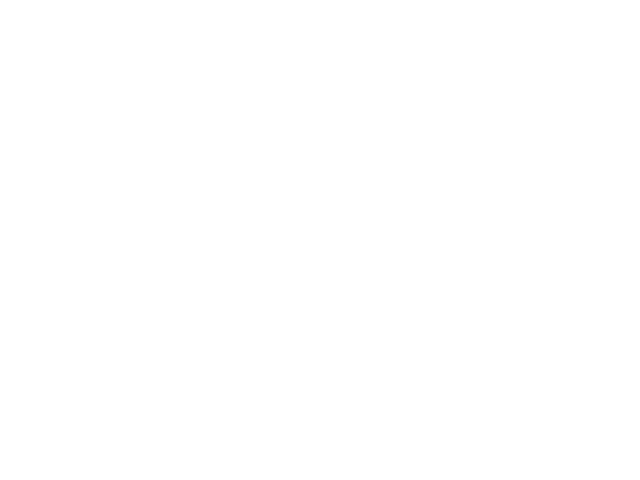

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


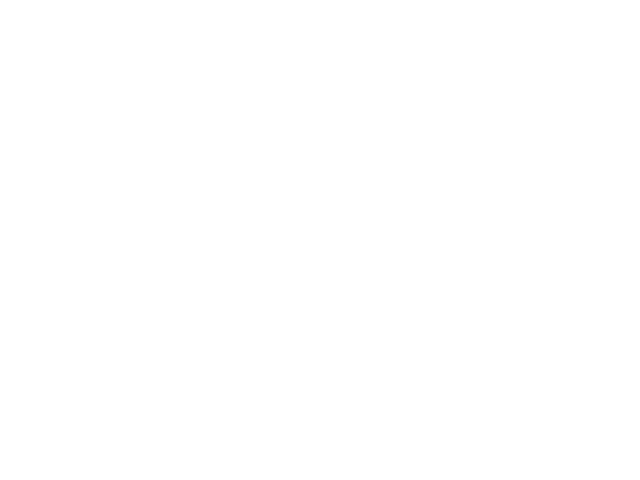

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


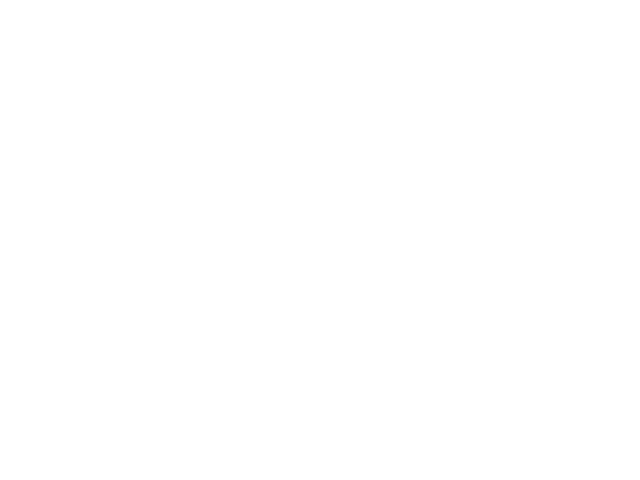

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


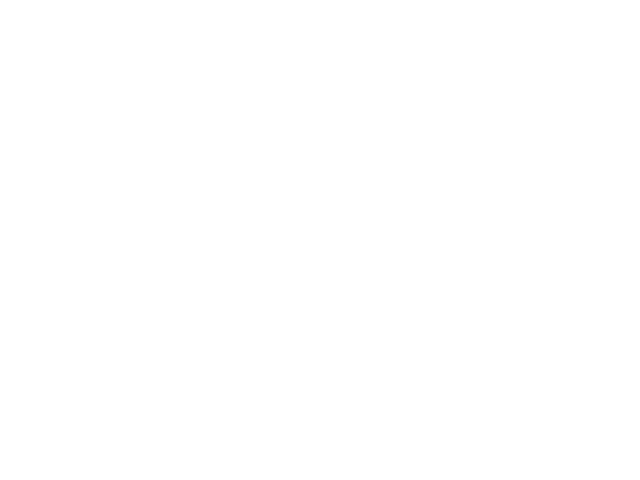

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


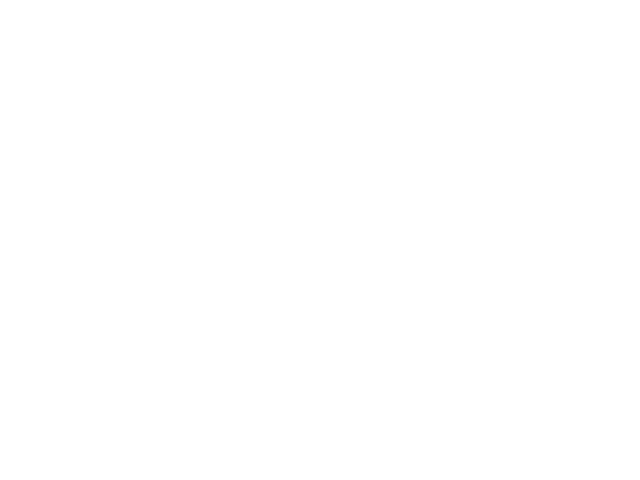

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


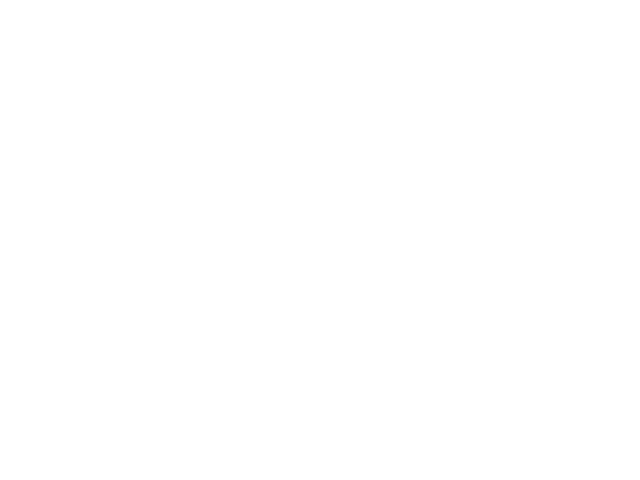

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


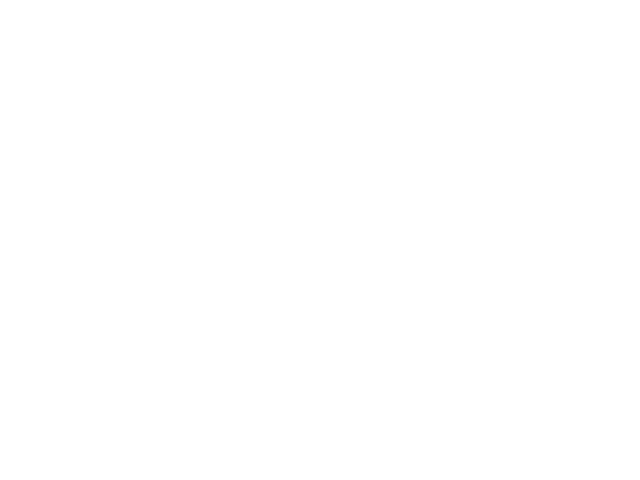

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


In [26]:
#do monthwise mid
for month, m_name in enumerate(months):
    monthly_data = df_mid[df_mid.index.month == month+1]
    hm_data = monthly_data['Hs']
    weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='Mid_'+m_name, N_obs=30*24)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


<IPython.core.display.Javascript object>


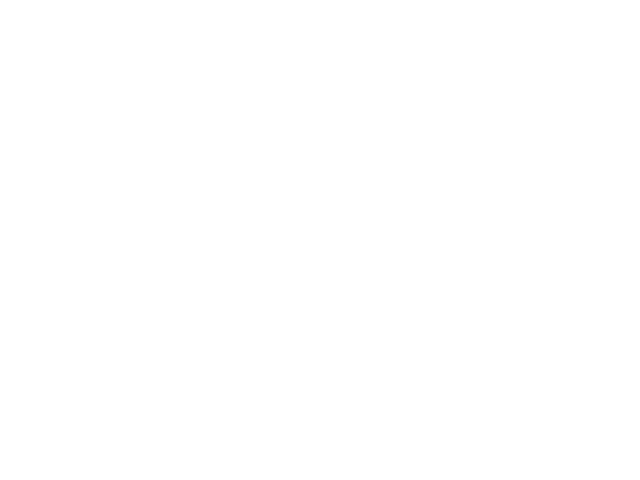

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


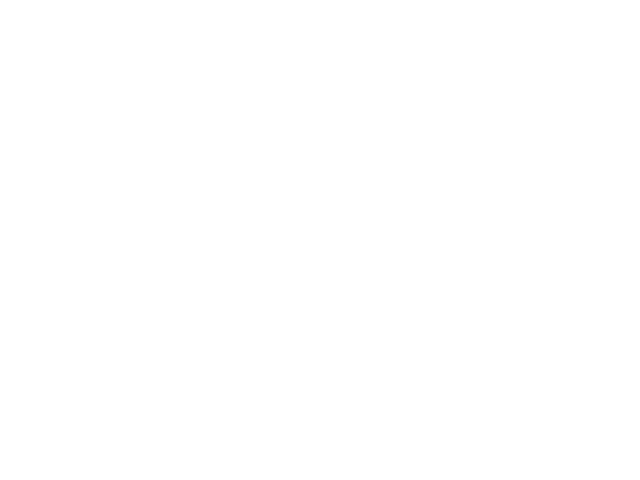

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


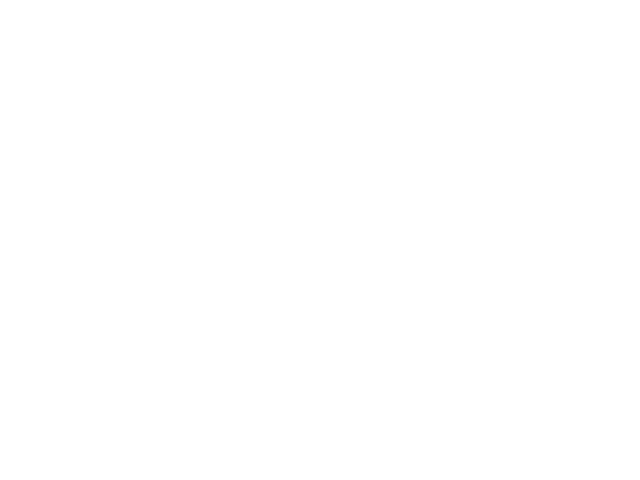

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


In [27]:
#do quarter wise mid
#winter from november to february
monthly_data = df_mid[(df_mid.index.month>10 )|(df_mid.index.month<3) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='Mid_Nov-Feb', N_obs=4*30*24)

#winter from march to jun
monthly_data = df_mid[(df_mid.index.month>2 )&(df_mid.index.month<7) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='Mid_Mar-Jun', N_obs=4*30*24)

#winter from luly to october
monthly_data = df_mid[(df_mid.index.month>6 )|(df_mid.index.month<11) ]
hm_data = monthly_data['Hs']
weibulEVC(hm_data , return_period=[1, 10, 50, 100, 1000, 10000], tag='Mid_Jul-Oct', N_obs=4*30*24)

Todo: the lower tail of the distributions do not match

$\beta =$ shape parameter

$\alpha =$ scale parameter

$\lambda =$ location parameter. It is almost 0. (~ 2cm). Need to check how this changes the shape

In [21]:
#yearly_max = df_south.groupby(a.index.year)['Hs'].max()
df = df_south
yearly_max = df.groupby(df.index.year)['Hs'].max()

In [22]:
mean_years = np.mean(yearly_max)
std_years = np.std(yearly_max)
#gummean_years, std_years, yearly_max

(0.7445087432861328, 0.09361577033996582, time
 2002    0.605030
 2003    0.878170
 2004    0.755333
 2005    0.871304
 2006    0.700399
 2007    0.693533
 2008    0.807978
 2009    0.629444
 2010    0.664541
 2011    0.737785
 2012    0.763725
 2013    0.724052
 2014    0.598164
 2015    0.823236
 2016    0.917845
 2017    0.741600
 Name: Hs, dtype: float32)

<IPython.core.display.Javascript object>


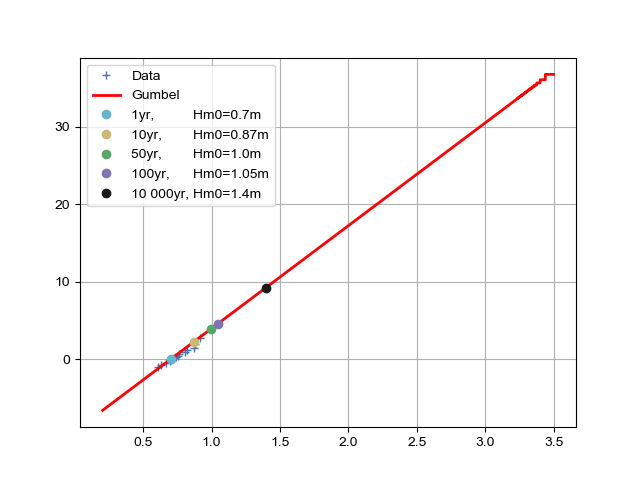

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [26]:
#gumble 
hm0y = df.groupby(df.index.year)['Hs'].max()
hm0y = hm0y[hm0y.index<2017]
Hm0 = np.arange(0.01, 3.5, 0.001)
my = np.mean(hm0y)
st = np.std(hm0y)

alpha = st*np.sqrt(6)/np.pi
myh = my - alpha*0.5772

pi = np.array([0.63, 1e-1, 2e-2, 1e-2, 1e-4])

xi = myh - alpha*np.log(-np.log(1.-pi))

F11 = np.exp(-np.exp(-(Hm0-myh)/alpha))
prob_ss = np.arange(len(hm0y))/len(hm0y)


plt.figure(1)
plt.plot(np.sort(hm0y), -np.log(-np.log(prob_ss)), '+b')
plt.plot(Hm0, -np.log(-np.log(F11)), 'r', lw=2.0)
plt.plot(xi[0], -np.log(-np.log(1.-pi[0])), 'oc')
plt.plot(xi[1], -np.log(-np.log(1.-pi[1])), 'oy')
plt.plot(xi[2], -np.log(-np.log(1.-pi[2])), 'og')
plt.plot(xi[3], -np.log(-np.log(1.-pi[3])), 'om')
plt.plot(xi[4], -np.log(-np.log(1.-pi[4])), 'ok')
plt.grid(True)
plt.legend(['Data', 'Gumbel', '1yr,          Hm0='+str(np.round(xi[0], 2))+'m', 
            '10yr,        Hm0='+str(np.round(xi[1], 2))+'m',
            '50yr,        Hm0='+str(np.round(xi[2], 2))+'m', 
            '100yr,      Hm0='+str(np.round(xi[3], 2))+'m', 
            '10 000yr, Hm0='+str(np.round(xi[4], 2))+'m'])

<IPython.core.display.Javascript object>


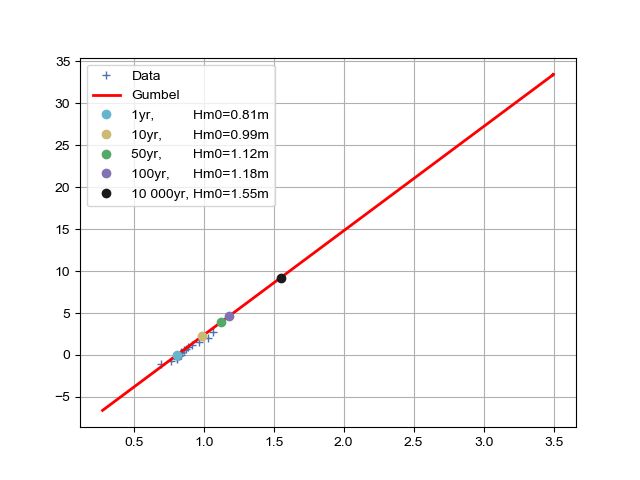

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


In [27]:
#gumble mid
df = df_mid
hm0y = df.groupby(df.index.year)['Hs'].max()
#hm0y = hm0y[hm0y.index<2017]
Hm0 = np.arange(0.01, 3.5, 0.001)
my = np.mean(hm0y)
st = np.std(hm0y)

alpha = st*np.sqrt(6)/np.pi
myh = my - alpha*0.5772

pi = np.array([0.63, 1e-1, 2e-2, 1e-2, 1e-4])

xi = myh - alpha*np.log(-np.log(1.-pi))

F11 = np.exp(-np.exp(-(Hm0-myh)/alpha))
prob_ss = np.arange(len(hm0y))/len(hm0y)


plt.figure(2)
plt.plot(np.sort(hm0y), -np.log(-np.log(prob_ss)), '+b')
plt.plot(Hm0, -np.log(-np.log(F11)), 'r', lw=2.0)
plt.plot(xi[0], -np.log(-np.log(1.-pi[0])), 'oc')
plt.plot(xi[1], -np.log(-np.log(1.-pi[1])), 'oy')
plt.plot(xi[2], -np.log(-np.log(1.-pi[2])), 'og')
plt.plot(xi[3], -np.log(-np.log(1.-pi[3])), 'om')
plt.plot(xi[4], -np.log(-np.log(1.-pi[4])), 'ok')
plt.grid(True)
plt.legend(['Data', 'Gumbel', '1yr,          Hm0='+str(np.round(xi[0], 2))+'m', 
            '10yr,        Hm0='+str(np.round(xi[1], 2))+'m',
            '50yr,        Hm0='+str(np.round(xi[2], 2))+'m', 
            '100yr,      Hm0='+str(np.round(xi[3], 2))+'m', 
            '10 000yr, Hm0='+str(np.round(xi[4], 2))+'m'])

In [23]:
def blockHscount(df, h, t, delH=0.1, delT=0.2):
    m = df[((df['Hs'] > h) & (df['Hs'] <= h+delH)) &
           ((df['Tp'] > t) & (df['Tp'] <= t+delT))]
    return(m.Hs.count(), m)


def blockHs(df, h, delH=0.1):
    m = df[((df['Hs'] > h) & (df['Hs'] <= h+delH))]
    return(m)

In [24]:
df = df_south
maxHs, deltaHs = 1.1, 0.1
maxTp, deltaTp = 4.2, 0.2


rows = ['{:0.2f} - {:0.2f}'.format(i, i+0.1) for i in np.arange(0, maxHs, deltaHs)]
cols = ['{:0.2f} - {:0.2f}'.format(i, i+0.2) for i in np.arange(0, maxTp, deltaTp)]

joint_distribution = pd.DataFrame([ [blockHscount(df, h, t)[0] 
                                     for t in np.arange(0, 4.2, 0.2)] 
                                   for h in np.arange(0, 1.1, 0.1)], index=rows, columns=cols)
joint_distribution

0.00 - 0.20  0.20 - 0.40  0.40 - 0.60  0.60 - 0.80  0.80 - 1.00  \
0.00 - 0.10            0            0            0            0            0   
0.10 - 0.20            0            0            0            0            0   
0.20 - 0.30            0            0            0            0            0   
0.30 - 0.40            0            0            0            0            0   
0.40 - 0.50            0            0            0            0            0   
0.50 - 0.60            0            0            0            0            0   
0.60 - 0.70            0            0            0            0            0   
0.70 - 0.80            0            0            0            0            0   
0.80 - 0.90            0            0            0            0            0   
0.90 - 1.00            0            0            0            0            0   
1.00 - 1.10            0            0            0            0            0   

             1.00 - 1.20  1.20 - 1.40  1.40 - 1.60  1.60 - 1.80  1.80 - 2.00  \
0.00 - 0.10         1629        43867        16261         1219          289   
0.10 - 0.20          389         9452        15721        11415         2830   
0.20 - 0.30            0            0           10         2611         8041   
0.30 - 0.40            0            0            0            0           91   
0.40 - 0.50            0            0            0            0            0   
0.50 - 0.60            0            0            0            0            0   
0.60 - 0.70            0            0            0            0            0   
0.70 - 0.80            0            0            0            0            0   
0.80 - 0.90            0            0            0            0            0   
0.90 - 1.00            0            0            0            0            0   
1.00 - 1.10            0            0            0            0            0   

             ...  2.20 - 2.40  2.40 - 2.60  2.60 - 2.80  2.80 - 3.00  \
0.00 - 0.10  ...           11            1            0            0   
0.10 - 0.20  ...          152           18            3            2   
0.20 - 0.30  ...         1240          128           20            1   
0.30 - 0.40  ...         4294         1529           91            4   
0.40 - 0.50  ...          271         1420          934           97   
0.50 - 0.60  ...            0           23          262          415   
0.60 - 0.70  ...            0            0            1           51   
0.70 - 0.80  ...            0            0            0            0   
0.80 - 0.90  ...            0            0            0            0   
0.90 - 1.00  ...            0            0            0            0   
1.00 - 1.10  ...            0            0            0            0   

             3.00 - 3.20  3.20 - 3.40  3.40 - 3.60  3.60 - 3.80  3.80 - 4.00  \
0.00 - 0.10            0            0            0            0            0   
0.10 - 0.20            1            0            0            0            0   
0.20 - 0.30            0            0            0            0            0   
0.30 - 0.40            2            1            0            0            0   
0.40 - 0.50            4            1            0            0            0   
0.50 - 0.60           55            0            0            0            0   
0.60 - 0.70           90           15            1            0            0   
0.70 - 0.80           15           14            3            1            0   
0.80 - 0.90            0            1            6            1            0   
0.90 - 1.00            0            0            0            1            0   
1.00 - 1.10            0            0            0            0            0   

             4.00 - 4.20  
0.00 - 0.10            0  
0.10 - 0.20            0  
0.20 - 0.30            0  
0.30 - 0.40            0  
0.40 - 0.50            0  
0.50 - 0.60            0  
0.60 - 0.70            0  
0.70 - 0.80            0  
0.80 - 0.90           

In [83]:
from scipy.stats import shapiro
from scipy.optimize import curve_fit
from scipy.stats import lognorm
import seaborn
seaborn.set()

In [159]:
def contourplots(df,tag, percen):
    blocksize = deltaHs/2
    block_low_ends = np.arange(0, maxHs, blocksize)
    x = block_low_ends + blocksize/2  # Centre of the Hs blocks
    

    logn_params = []
    for ble in block_low_ends:
        m = df[((df['Hs'] > ble) & (df['Hs'] <= ble+blocksize))]
        mask = np.isfinite(m.Tp)
        t = m.Tp[mask]
        s, loc, scale = lognorm.fit(t, floc=0) #need to keep the location param 0 for lognormal
        logn_params.append([s, loc, scale])
        #if np.allclose(np.std(np.log(t)),s)& np.allclose(np.exp(np.mean(np.log(t))),scale) : pass
        # else: print(ble, 'wasnt close.',np.std(np.log(t)),s,np.exp(np.mean(np.log(t))),scale)
    logn_params = np.array(logn_params)

    scaleparam = logn_params[:, 2]  # np.log(logn_params[:,2])
    sparam = logn_params[:, 0]
    location = logn_params[:, 1]
    #logn_params

    #Find a continuouts function for scale parameters 
    def fit_func_mu(x, a, b, c): return a + b*x**c
    mask = np.isfinite(scaleparam)
    popt_scalep,_ = curve_fit(fit_func_mu, x[mask], scaleparam[mask], maxfev =1600)

    plt.figure('fitting_mean'+tag)
    plt.plot(x, scaleparam,'o', label ='scale parameter')
    plt.plot(x, fit_func_mu(x, *popt_scalep), 'b', label= 'scale_fitted')

    plt.xlabel('Hs(m)'); plt.ylabel('mean conditional Tp, μ (s)')
    plt.title('μ(h) = {:.2f} + {:.2f}*h^{:.2f}'.format(*popt_scalep))
    plt.legend()
    #plt.close()

    #Find a continuouts function for 's' parameters 
    def fit_func_sigma(x, b, c ): return b*np.exp(-x*c)

    y = sparam
    mask = np.isfinite(y)
    #y = np.log(y)
    popt_std, _ = curve_fit(fit_func_sigma, x[mask], y[mask])

    plt.figure('fitting_std '+tag)
    plt.plot(x, y,'o')
    plt.plot(x, fit_func_sigma(x,*popt_std), 'r')
    #plt.xlim([0,1]); plt.ylim([0,0.3])
    plt.xlabel('Hs(m)'); plt.ylabel('σ(s)')
    plt.title('σ(h) =  {:.2f}exp(h*{:.2f})'.format(*popt_std))
    plt.grid(True)
    #plt.close()

    # doing the weibul 3 parameter fit on the Hs data
    hm_data = df.Hs
    lambd, alpha, beta = weib3pfit(hm_data)
    # sample space of the max wave height. discretized to every mm
    # sample space for the probablity, Hm_ss
    # max limit of sample space, Hm_ss_max, set to 4times. Arbitarily.
    # This is set up to be able to estimate high enough return periods
    Hm_ss_max = (int(np.max(hm_data)*4*2)+1)/2
    # print(Hm_ss_max)
    Hm_ss = np.arange(0.01, Hm_ss_max, 0.001)

    # sample space for probabilty of occurance
    prob_ss = np.arange(len(hm_data))/len(hm_data)

    # cumulative probablity, F
    # an absolute value Hm_ss and lambda can be taken so as to ensure positive
    # value at low values of Hm_ss but this gives an unrealistically decreasing tail.
    #F = 1 - np.exp(-(np.abs(Hm_ss - lambd)/alpha)**beta)
    F = 1 - np.exp(-((Hm_ss - lambd)/alpha)**beta)

    # Finding h from the script received from LinL

    return_period = [1, 10, 50, 100, 1000, 10000]
    N_obs = 365*24*percen

    return_prob = [1-1/(N_obs*ret_per) for ret_per in return_period]
    return_prob = np.array(return_prob)

    # compute the exteme values of Hs
    exceedance_index = [np.where(F > prob) for prob in return_prob]
    exceedance_index = [i[0][0] for i in exceedance_index]
    Hs_extremes = Hm_ss[exceedance_index]
    Tp_extremes = []

    beta = norm.ppf(return_prob, 0, 1)

    r = np.arange(0, 2*np.pi, 0.001)

    plt.figure('contours '+tag)
    mask = df.Tp < 15
    plt.plot(df.Hs[mask], df.Tp[mask], 'k.', alpha=0.3, label='data')
    for i, retp in (enumerate(return_period)):
        u1 = beta[i]*np.sin(r)
        u2 = beta[i]*np.cos(r)
        a = norm.cdf(u1, 0, 1)
        exceedance_index = [np.where(F > prob) for prob in a]
        exceedance_index = [i[0][0] for i in exceedance_index]
        h = Hm_ss[exceedance_index]
        u2cdf = norm.cdf(u2, 0, 1)
        #[lognorm.ppf(u2cdf, fit_func_mu(i, *popt_mu), fit_func_std(i, *popt_std)) for i in h]
        t = lognorm.ppf(u2cdf, s=fit_func_sigma(h, *popt_std),scale=fit_func_mu(h, *popt_scalep))
        # find corresponding value of Tp for exteme Hs
        Tp_extremes.append(t[np.abs(h-Hs_extremes[i]).argmin()])
        plt.plot(h, t, label=str(retp)+' yrs')

    Tp_extremes = np.array(Tp_extremes)
    plt.plot(Hs_extremes, Tp_extremes, 'o', label='extremes')
    plt.xlabel('Hs'),plt.ylabel('Tp')
    plt.title('contour plots '+tag)
    plt.legend()
    #plt.savefig('./contour plots '+tag.replace(':','_')+'.png', dpi=300)
    #plt.close()
    print(Hs_extremes, Tp_extremes)
    return([Hs_extremes, Tp_extremes])    

<IPython.core.display.Javascript object>


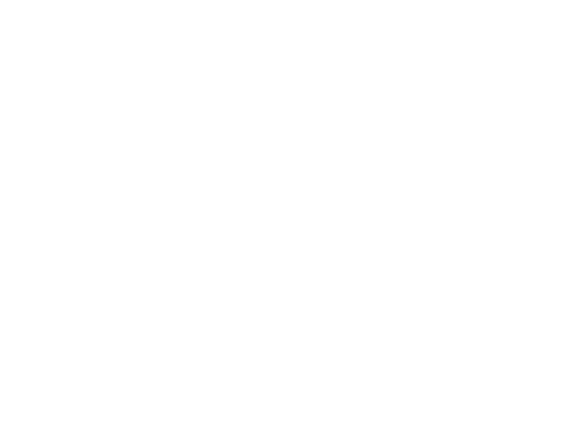

<IPython.core.display.Javascript object>


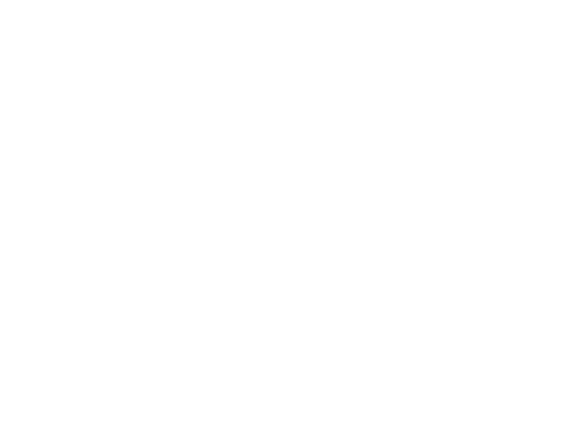

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


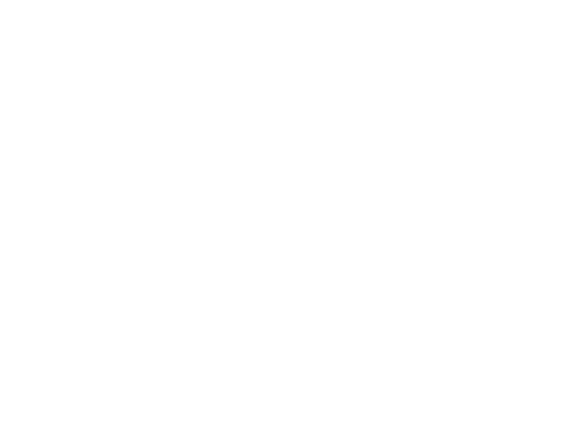

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in greater


[0.841 1.014 1.132 1.182 1.345 1.505] [3.49810317 3.87885137 4.12752265 4.23209092 4.56940127 4.88814116]


In [148]:
df = df_south
HsTpextreme = {}
HsTpextreme['omni_south'] = contourplots(df, 'South Omni')

In [162]:
df.Hs.count()

134376

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4429: RuntimeWarning: Mean of empty slice.
  scale = np.exp(lndata.mean())
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


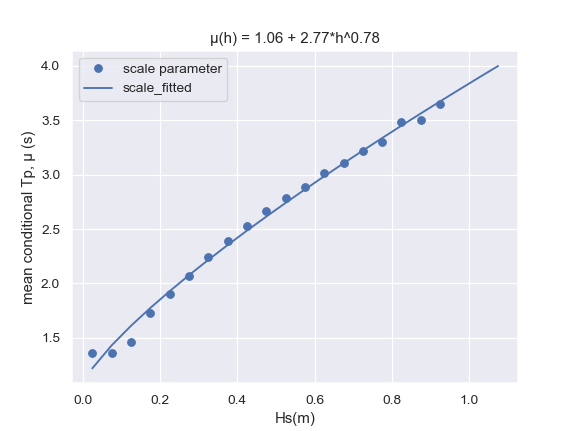

<IPython.core.display.Javascript object>


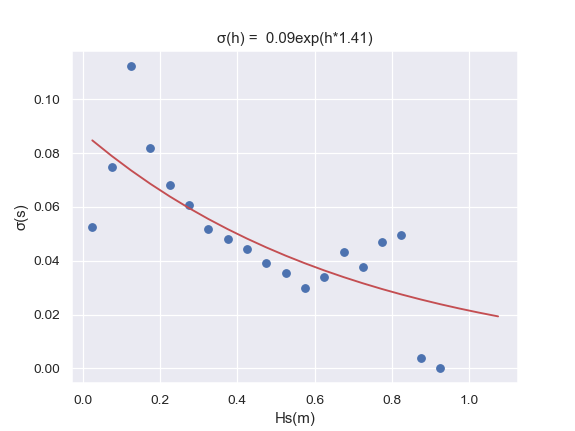

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


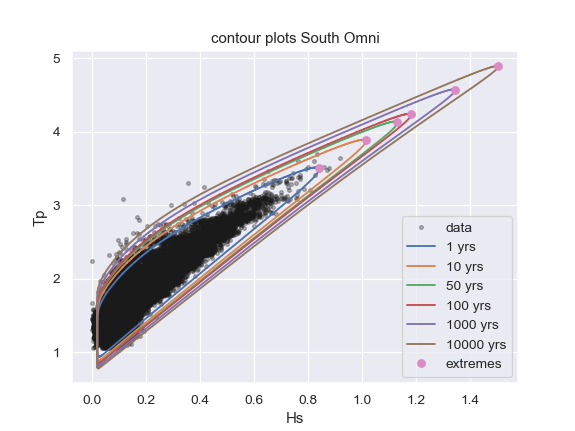

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in greater


[0.841 1.014 1.132 1.182 1.345 1.505] [3.49810317 3.87885137 4.12752265 4.23209092 4.56940127 4.88814116]
insufficient data:  South sector: 345-15 1105
insufficient data:  South sector: 15-45 319
insufficient data:  South sector: 45-75 223
insufficient data:  South sector: 75-105 312
insufficient data:  South sector: 105-135 1274
South sector: 135-165 43077


<IPython.core.display.Javascript object>


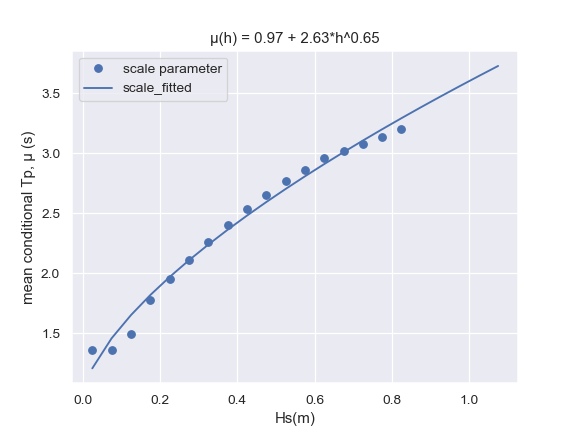

<IPython.core.display.Javascript object>


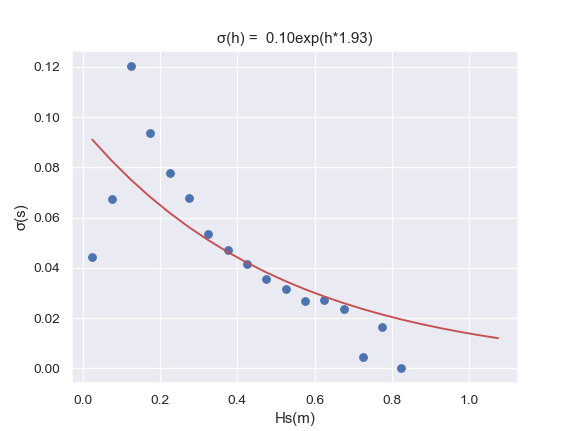

<IPython.core.display.Javascript object>


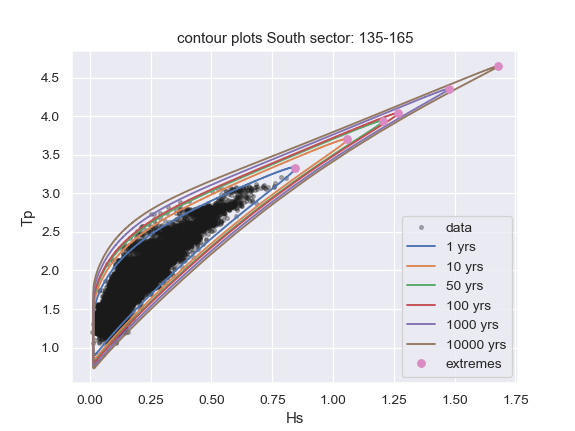

[0.844 1.059 1.207 1.269 1.476 1.679] [3.33531642 3.70625195 3.94366582 4.0451116  4.35861449 4.65368778]
South sector: 165-195 38119


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


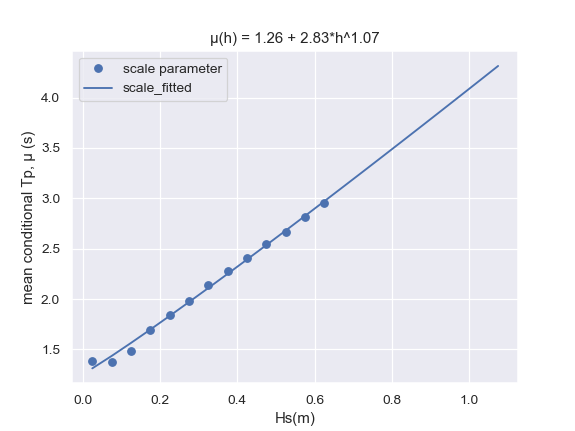

<IPython.core.display.Javascript object>


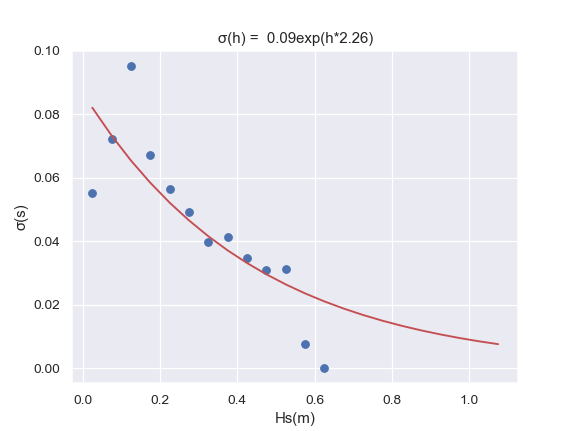

<IPython.core.display.Javascript object>


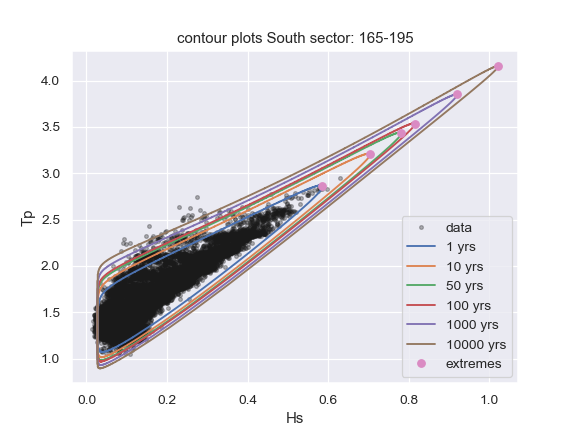

[0.586 0.704 0.782 0.815 0.92  1.022] [2.8642784  3.20656928 3.43852263 3.53382822 3.85278243 4.15617424]
insufficient data:  South sector: 195-225 2302
insufficient data:  South sector: 225-255 1305
insufficient data:  South sector: 255-285 1526
South sector: 285-315 3561


<IPython.core.display.Javascript object>


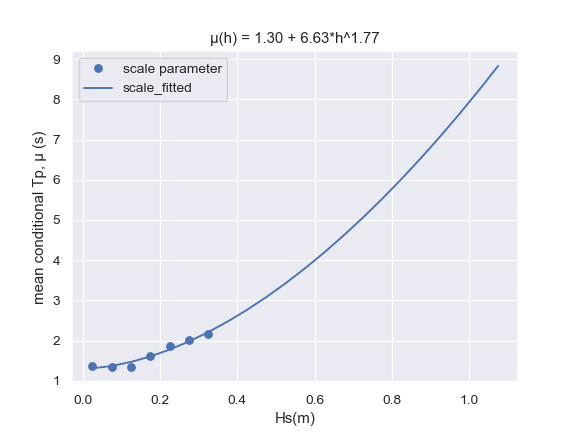

<IPython.core.display.Javascript object>


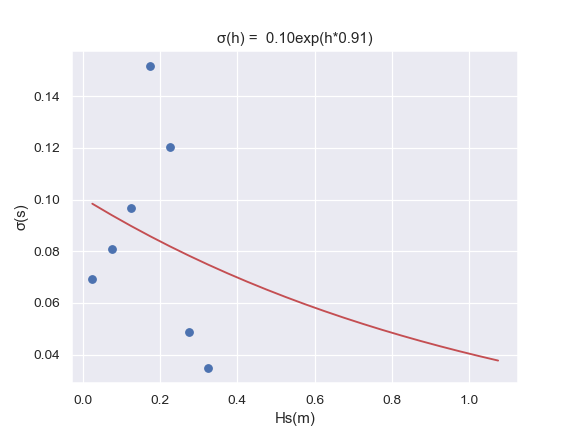

<IPython.core.display.Javascript object>


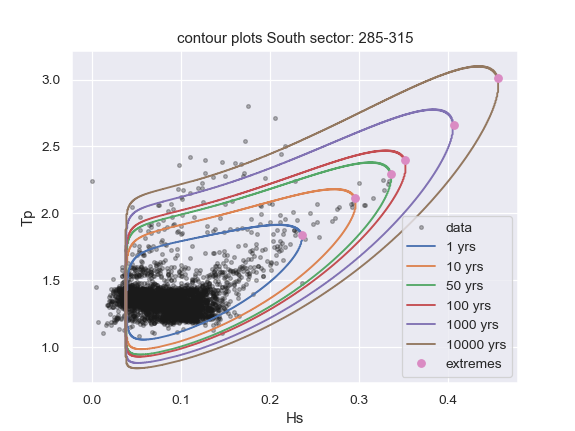

[0.236 0.296 0.336 0.352 0.406 0.456] [1.8408765  2.11152701 2.29663295 2.39642322 2.66090969 3.00807441]
South sector: 315-345 41253


<IPython.core.display.Javascript object>


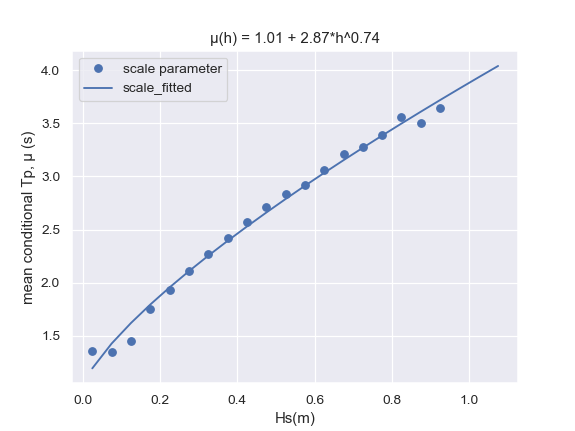

<IPython.core.display.Javascript object>


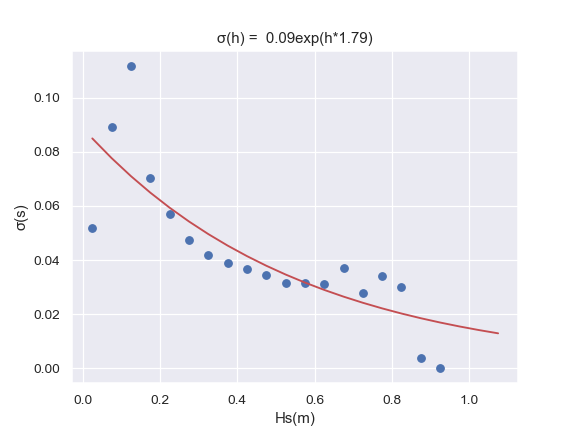

<IPython.core.display.Javascript object>


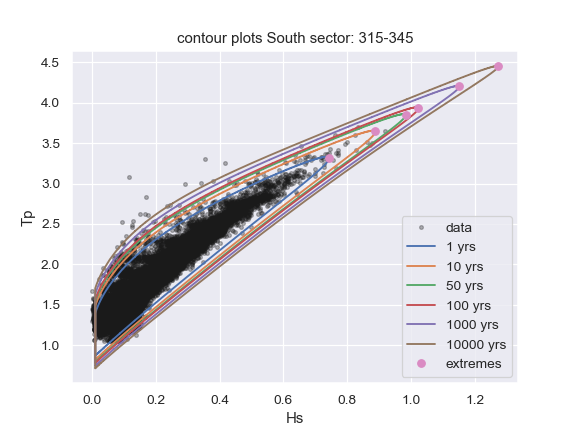

[0.743 0.888 0.983 1.023 1.151 1.273] [3.31772194 3.64376498 3.85328536 3.93748718 4.20340401 4.4505219 ]


In [164]:
#contour lines south

df = df_south
totcount = df.Hs.count()
HsTpextreme = {}
HsTpextreme['omni_south'] = contourplots(df, 'South Omni', df.Hs.count()/totcount)


secU=list(range(15, 360, 30))
secL = secU[-1:]+secU[:-1]

for a,b in zip(secL,secU):
    if a<b:
        df1 = df[(df.Wdir > a) & (df.Wdir <= b)]
    else:
        df1 = df[(df.Wdir > a) | (df.Wdir <= b)]
    tag='South sector: {}-{}'.format(a,b)
    if len(df1.Hs)>3000:
        
        print(tag,len(df1.Hs), )
        HsTpextreme[tag]=contourplots(df1,tag, df1.Hs.count()/totcount)
    else:
        print('insufficient data: ',tag,len(df1.Hs))
        HsTpextreme[tag]='insufficient data'

HsTpExtSouth= HsTpextreme

In [165]:
HsTpExtSouth

{'omni_south': [array([0.841, 1.014, 1.132, 1.182, 1.345, 1.505]),
  array([3.49810317, 3.87885137, 4.12752265, 4.23209092, 4.56940127,
         4.88814116])],
 'South sector: 345-15': 'insufficient data',
 'South sector: 15-45': 'insufficient data',
 'South sector: 45-75': 'insufficient data',
 'South sector: 75-105': 'insufficient data',
 'South sector: 105-135': 'insufficient data',
 'South sector: 135-165': [array([0.844, 1.059, 1.207, 1.269, 1.476, 1.679]),
  array([3.33531642, 3.70625195, 3.94366582, 4.0451116 , 4.35861449,
         4.65368778])],
 'South sector: 165-195': [array([0.586, 0.704, 0.782, 0.815, 0.92 , 1.022]),
  array([2.8642784 , 3.20656928, 3.43852263, 3.53382822, 3.85278243,
         4.15617424])],
 'South sector: 195-225': 'insufficient data',
 'South sector: 225-255': 'insufficient data',
 'South sector: 255-285': 'insufficient data',
 'South sector: 285-315': [array([0.236, 0.296, 0.336, 0.352, 0.406, 0.456]),
  array([1.8408765 , 2.11152701, 2.29663295, 2.396

[345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315]
[[  802     0     0     0     0]
 [  223     0     0     0     0]
 [  172     0     0     0     0]
 [  268     0     0     0     0]
 [ 1177     0     0     0     0]
 [24016  4700  1285    77     1]
 [15716  5850   359     1     0]
 [ 1568     3     0     0     0]
 [  851     1     0     0     0]
 [  969     0     0     0     0]
 [ 2352    52     0     0     0]
 [15531  7519  1085    80     7]] [345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315] [  802   223   172   268  1177 30079 21926  1571   852   969  2404 24222]


<IPython.core.display.Javascript object>


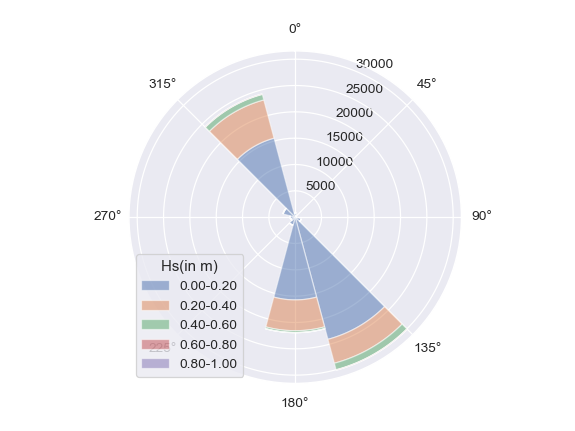

In [130]:
#sector wise wave rose

df = df_south
secU=list(range(15, 360, 30))
secL = secU[-1:]+secU[:-1]
print(secL)
hcounts=[]
hsblockwidth=0.2
hblocks = np.arange(0,1,hsblockwidth)
for a,b in zip(secL,secU):
    if a<b:
        df1 = df[(df.Wdir > a) & (df.Wdir <= b)]
    else:
        df1 = df[(df.Wdir > a) | (df.Wdir <= b)]
    tag='sector: {}-{}'.format(a,b)
    
    hcount = [df1[(df1.Hs>i) & (df1.Hs<=(i+0.1))].Hs.count() for i in hblocks]
    hcounts.append(hcount)
hcounts = np.array(hcounts) #/df.Hs.count()
print(hcounts, secL,np.sum(hcounts, axis=1))

theta = np.deg2rad(secL)
radii = hcounts
width = np.pi / 6
#colors = plt.cm.viridis(radii / 10.)
plt.figure('waverose')
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#for i,rad in enumerate(radii):
for i,h in enumerate(hcount):
    ax.bar(theta+np.deg2rad(15), radii[:,i], width=width, 
           bottom=np.sum(radii[:,:i], axis =1),  alpha=0.5)
plt.legend(['{:.2f}-{:.2f}'.format(hl,hl+hsblockwidth) for hl in hblocks], title='Hs(in m)', loc=3)
plt.savefig('windrose_south.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


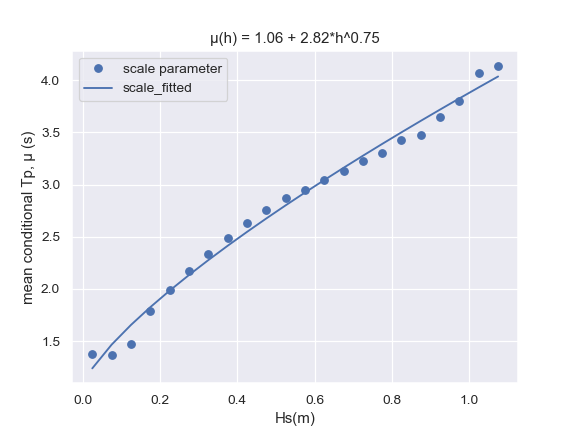

<IPython.core.display.Javascript object>


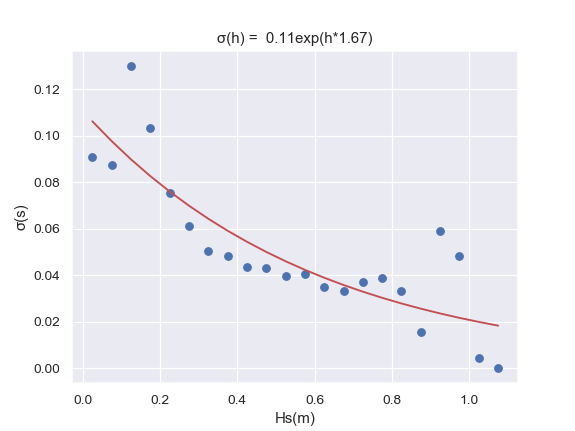

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


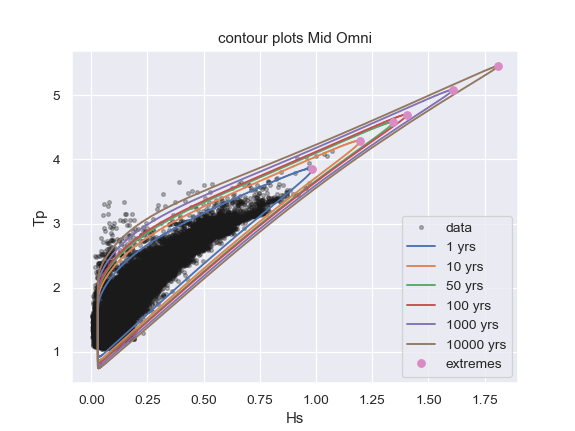

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in greater


[0.983 1.196 1.342 1.404 1.609 1.81 ] [3.85290742 4.29031582 4.57931763 4.70112966 5.08653094 5.4584303 ]
insufficient data:  Mid sector 345-15 283
insufficient data:  Mid sector 15-45 192
insufficient data:  Mid sector 45-75 240
insufficient data:  Mid sector 75-105 599
Mid sector 105-135 21668


<IPython.core.display.Javascript object>


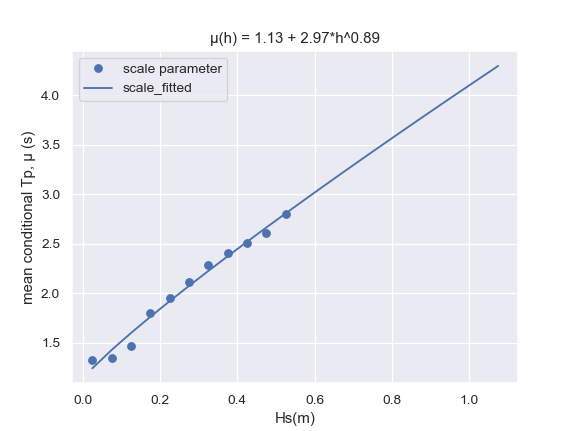

<IPython.core.display.Javascript object>


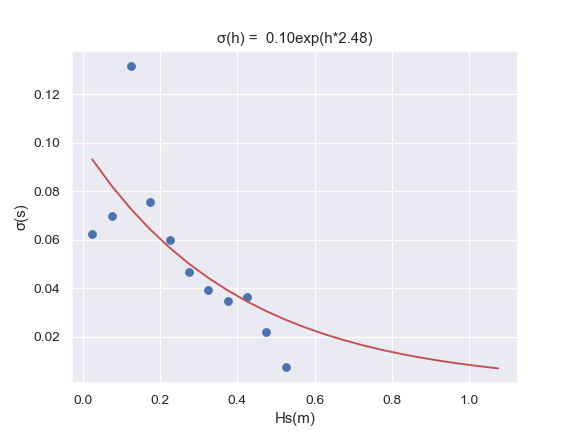

<IPython.core.display.Javascript object>


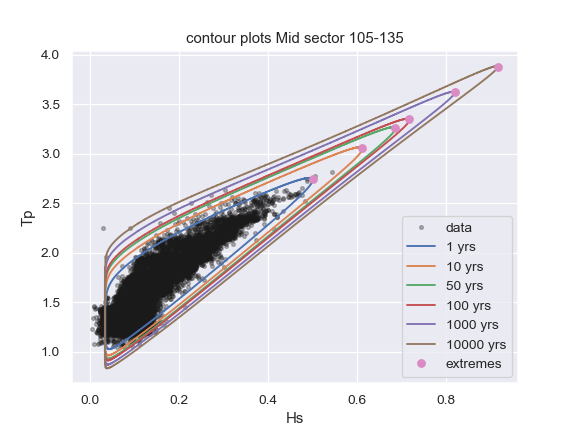

[0.501 0.612 0.687 0.718 0.82  0.918] [2.74051654 3.06131289 3.26407435 3.35129557 3.62219602 3.880988  ]
Mid sector 135-165 56555


<IPython.core.display.Javascript object>


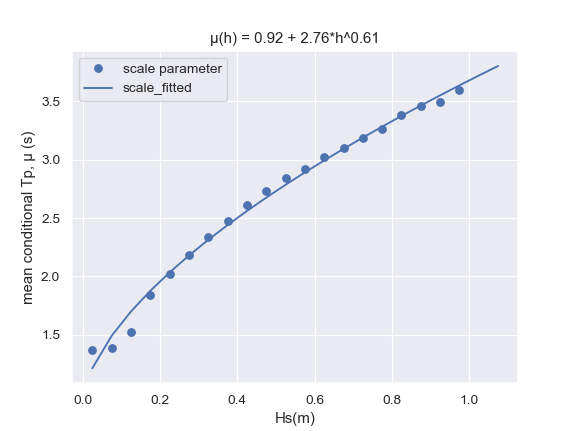

<IPython.core.display.Javascript object>


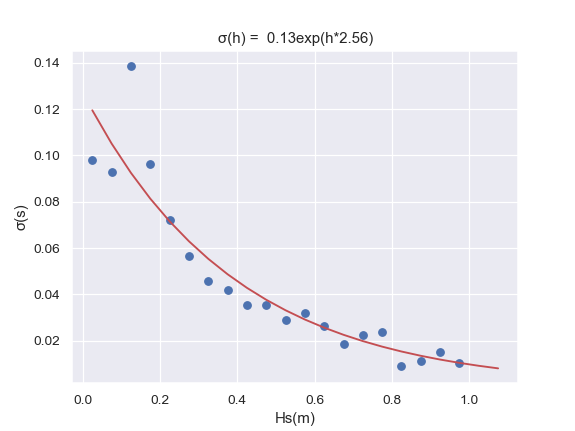

<IPython.core.display.Javascript object>


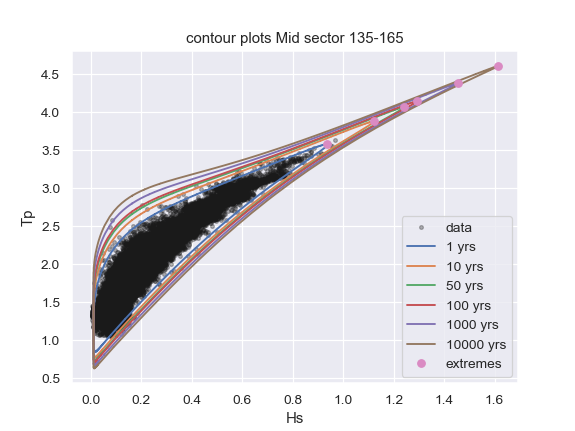

[0.938 1.121 1.242 1.293 1.457 1.614] [3.57656941 3.87756934 4.0674853  4.14467898 4.38614394 4.60835643]
insufficient data:  Mid sector 165-195 2582
insufficient data:  Mid sector 195-225 1626
insufficient data:  Mid sector 225-255 1453
insufficient data:  Mid sector 255-285 2381
Mid sector 285-315 44391


<IPython.core.display.Javascript object>


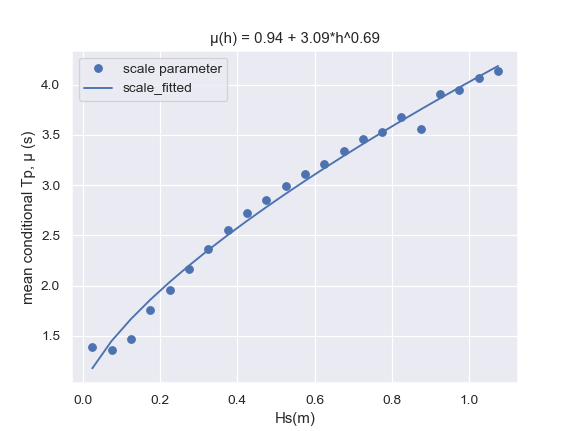

<IPython.core.display.Javascript object>


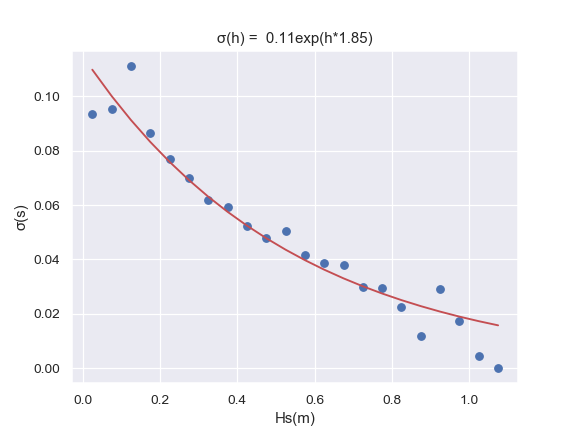

<IPython.core.display.Javascript object>


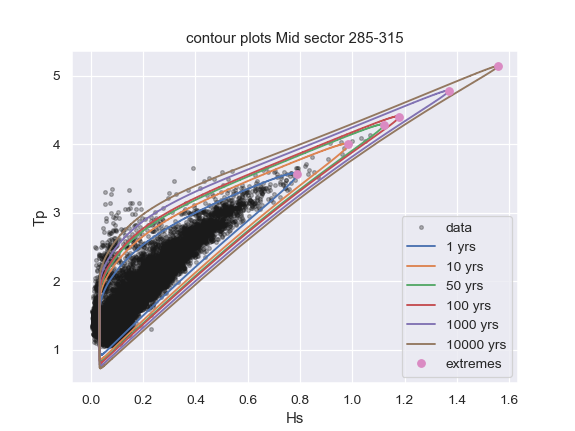

[0.787 0.985 1.121 1.179 1.369 1.558] [3.5666921  4.00089737 4.2845196  4.40331923 4.78603598 5.14301992]
insufficient data:  Mid sector 315-345 2406


In [167]:
#contour lines Mid

df = df_mid
totcount = df.Hs.count()
HsTpextreme = {}
HsTpextreme['omni'] =contourplots(df, 'Mid Omni', df.Hs.count()/totcount)

secU=list(range(15, 360, 30))
secL = secU[-1:]+secU[:-1]
for a,b in zip(secL,secU):
    if a<b:
        df1 = df[(df.Wdir > a) & (df.Wdir <= b)]
    else:
        df1 = df[(df.Wdir > a) | (df.Wdir <= b)]
    tag='Mid sector {}-{}'.format(a,b)
    if len(df1.Hs)>3000:
        
        print(tag,len(df1.Hs))
        HsTpextreme[tag]=contourplots(df1,tag, df1.Hs.count()/totcount)
    else:
        print('insufficient data: ',tag,len(df1.Hs))
        HsTpextreme[tag]='insufficient data'
HsTpExtMid = HsTpextreme


In [168]:

a =HsTpExtMid
for key in a.keys():
    print(key,':',a[key])

omni : [array([0.983, 1.196, 1.342, 1.404, 1.609, 1.81 ]), array([3.85290742, 4.29031582, 4.57931763, 4.70112966, 5.08653094,
       5.4584303 ])]
Mid sector 345-15 : insufficient data
Mid sector 15-45 : insufficient data
Mid sector 45-75 : insufficient data
Mid sector 75-105 : insufficient data
Mid sector 105-135 : [array([0.501, 0.612, 0.687, 0.718, 0.82 , 0.918]), array([2.74051654, 3.06131289, 3.26407435, 3.35129557, 3.62219602,
       3.880988  ])]
Mid sector 135-165 : [array([0.938, 1.121, 1.242, 1.293, 1.457, 1.614]), array([3.57656941, 3.87756934, 4.0674853 , 4.14467898, 4.38614394,
       4.60835643])]
Mid sector 165-195 : insufficient data
Mid sector 195-225 : insufficient data
Mid sector 225-255 : insufficient data
Mid sector 255-285 : insufficient data
Mid sector 285-315 : [array([0.787, 0.985, 1.121, 1.179, 1.369, 1.558]), array([3.5666921 , 4.00089737, 4.2845196 , 4.40331923, 4.78603598,
       5.14301992])]
Mid sector 315-345 : insufficient data


[345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315]
[[  177     0     0     0     0]
 [  135     0     0     0     0]
 [  173     0     0     0     0]
 [  413     0     0     0     0]
 [10765  2815    48     0     0]
 [17653 11137  2843   491    36]
 [ 1267   109     2     0     0]
 [  747     3     0     0     0]
 [  762     0     0     0     0]
 [ 1412    48     0     0     0]
 [18823  6583   756    76     7]
 [ 1453    61     0     0     0]] [345, 15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315] [  177   135   173   413 13628 32160  1378   750   762  1460 26245  1514]


<IPython.core.display.Javascript object>


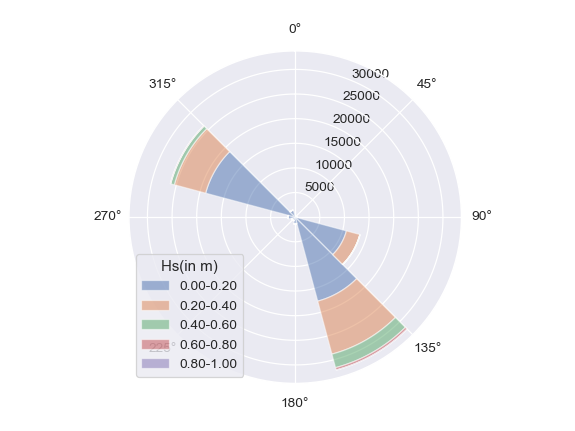

In [135]:
#sector wise wave rose

df = df_mid
secU=list(range(15, 360, 30))
secL = secU[-1:]+secU[:-1]
print(secL)
hcounts=[]
hsblockwidth=0.2
hblocks = np.arange(0,1,hsblockwidth)
for a,b in zip(secL,secU):
    if a<b:
        df1 = df[(df.Wdir > a) & (df.Wdir <= b)]
    else:
        df1 = df[(df.Wdir > a) | (df.Wdir <= b)]
    tag='sector: {}-{}'.format(a,b)
    
    hcount = [df1[(df1.Hs>i) & (df1.Hs<=(i+0.1))].Hs.count() for i in hblocks]
    hcounts.append(hcount)
hcounts = np.array(hcounts) #/df.Hs.count()
print(hcounts, secL,np.sum(hcounts, axis=1))

theta = np.deg2rad(secL)
radii = hcounts
width = np.pi / 6
#colors = plt.cm.viridis(radii / 10.)
plt.figure('waverose_mid')
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#for i,rad in enumerate(radii):
for i,h in enumerate(hcount):
    ax.bar(theta+np.deg2rad(15), radii[:,i], width=width, 
           bottom=np.sum(radii[:,:i], axis =1),  alpha=0.5)
plt.legend(['{:.2f}-{:.2f}'.format(hl,hl+hsblockwidth) for hl in hblocks], title='Hs(in m)', loc=3)
plt.savefig('Mid Wave rose.png', dpi=300)
plt.show()

Study report for marine operations: Methodology for dry access to pontoons of floating bridge Bjørnafjorden
Between May and July 2019, OceanTech AS conducted a study on behalf of Statens Vegvesen. In the study, the marine operations for dry access to the Bjørnafjorden floating bridge pontoons were investigated. This technical note contains a short summary of the report, together with some considerations by Statens Vegvesen.
The study is high level, and the intended scope of work was:
•	Propose a feasible technical solution
•	Describe methodology for marine operations
•	Highlight technical challenges
•	Estimate cost and time consumption
•	Propose alternative non-conventional options
In the report, the main phases of the marine operations and the maintenance operation are described and illustrated, in addition to time and cost estimates and vessel requirements.
The proposed base case solution from the study is a dry dock barge, which can either be towed or self-propelled. A suitable dry dock barge is not on the market today and must be built. The dry dock barges that are available on the market are not wide enough and are considered not ideal since they are too high to pass under the bridge. It should be noted that a similar solution was proposed in an earlier study (ref. /1/), where barges that are available today were used (Boa barges). These barges do however not have side walls, and the dock would have to be built on top of the barge.
Station keeping of the barge will be done either by use of DP or by anchored mooring lines. The suggested dock is equipped with a working deck in the aft end and dock gates in the front. Instead of conventional tugs, a multi purpose vessel is proposed as an option for positioning and support.
It is suggested that the pontoons are supported by a grillage structure inside the barge. The report emphasize that a detailed analysis is required to understand motions in roll, yaw and pitch on the dock. Statens Vegvesen has also highlighted that a proper dynamic analysis is required to understand how large the buoyancy from the dock has be to avoid motion relative to the pontoons. This analysis will also be required for deciding whether seafastening is needed. For future pontoon design engineering, the additional forces between the maintenance dock and the pontoons need to be considered.
A total of 14 days is estimated for marine operations and full surface treatment on one pontoon using the base case solution. This includes 12 days of scaffolding, sand blasting and painting. Relocation of mooring lines are estimated to take 4 days using tugs. 
Several alternative solutions for dry access to the pontoons are proposed in the report. OceanTech suggests the connection point of the mooring lines could be attached to davits attached to the upper part of the column or to the bridge body. The advantage of this is that the mooring lines could be kept in place during maintenance of the pontoons. Limited feasibility checks for the alternative solutions have been performed in the study. Statens Vegvesen has concerns for this method for several reasons, among others due to increased weight and structural integrity of the attachment system.
The work covered by the study will take place many years from now. There is a section where some future trends relevant for the marine operation and maintenance work such as autonomous systems, artificial intelligence and electric vessels are briefly mentioned. There are also robotized solutions that can be used for parts of the maintenance work. By extension, Statens Vegvesen notes that there could be future solutions that does not exist today, which are better suited than the base case in this study report. For instance, the work conducted in this study is based on a full re-coating of all pontoons. In the future, full re-coating may not be necessary due to technological advances.
Using the high-level information from the study report, Statens Vegvesen has summarized some recommended engineering actions as the design of the bridge gets more mature in the list below:
•	Perform a dynamic analysis of maintenance operation. Possible output:
o	Weather limitations
o	Seafastening requirements – does the pontoon need to be secured inside the dry dock, and if applicable what is required?
o	Dynamic loads on pontoon - these loads need to be considered in the pontoon design.
•	Detail design of grillage inside the dry dock
•	Mooring design - keep the maintenance operation in mind when designing the mooring system. Investigate if mooring connection points can be positioned in more advantageous for dry dock access


THe scale parameter from the lognorm distribution shows better match to the to the 
$y = a+b*x^c$ so we will use that 

<IPython.core.display.Javascript object>


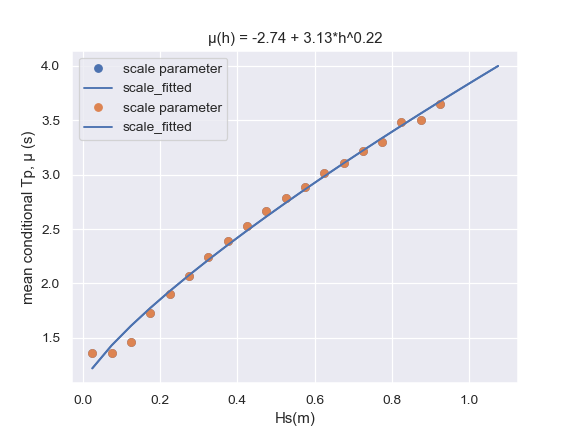

<IPython.core.display.Javascript object>


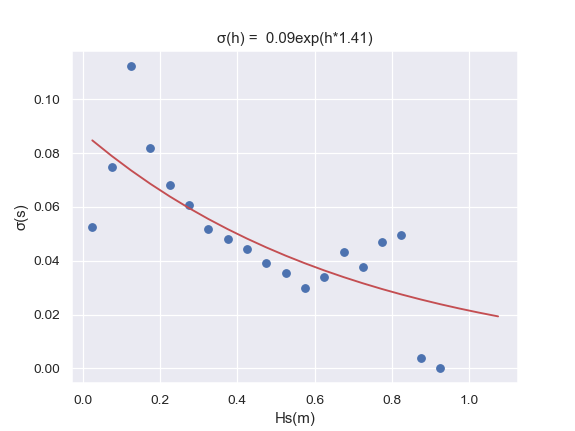

In [231]:
def fit_func_sigma(x, b, c ): return b*np.exp(-x*c)
#def fit_func_std(x, a, b, c, d ): return a + b*x+c*x**2+d*x**3 

y = sparam
mask = np.isfinite(y)
#y = np.log(y)
popt_std, _ = curve_fit(fit_func_sigma, x[mask], y[mask])

plt.figure('fitting_std')
plt.plot(x, y,'o')
plt.plot(x, fit_func_sigma(x,*popt_std), 'r')
#plt.xlim([0,1]); plt.ylim([0,0.3])
plt.xlabel('Hs(m)'); plt.ylabel('σ(s)')
plt.title('σ(h) =  {:.2f}exp(h*{:.2f})'.format(*popt_std))
plt.grid(True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


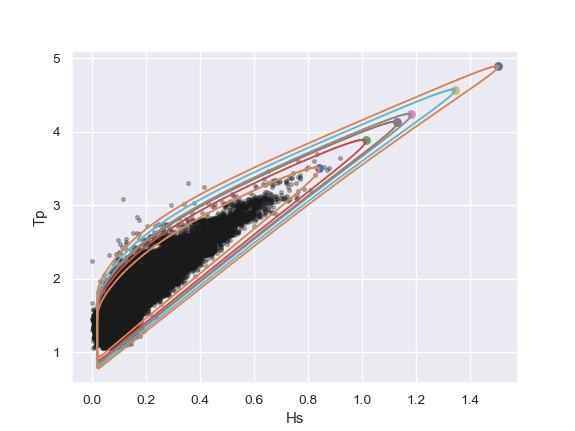

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


(array([0.841, 1.014, 1.132, 1.182, 1.345, 1.505]),
 [3.4981031650358005,
  3.878851372220787,
  4.127522652107836,
  4.232090916046452,
  4.569401272433608,
  4.88814115603461])

In [281]:
df = df_south

In [169]:
import scikit-extremes

SyntaxError: invalid syntax (<ipython-input-169-39e29bb0ff11>, line 1)

In [170]:
import skextremes as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
data = ske.datasets.portpirie()

In [180]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 'asarray',
 'description',
 'fields']

In [181]:
data._data

array([[1923.  ,    4.03],
       [1924.  ,    3.83],
       [1925.  ,    3.65],
       [1926.  ,    3.88],
       [1927.  ,    4.01],
       [1928.  ,    4.08],
       [1929.  ,    4.18],
       [1930.  ,    3.8 ],
       [1931.  ,    4.36],
       [1932.  ,    3.96],
       [1933.  ,    3.98],
       [1934.  ,    4.69],
       [1935.  ,    3.85],
       [1936.  ,    3.96],
       [1937.  ,    3.85],
       [1938.  ,    3.93],
       [1939.  ,    3.75],
       [1940.  ,    3.63],
       [1941.  ,    3.57],
       [1942.  ,    4.25],
       [1943.  ,    3.97],
       [1944.  ,    4.05],
       [1945.  ,    4.24],
       [1946.  ,    4.22],
       [1947.  ,    3.73],
       [1948.  ,    4.37],
       [1949.  ,    4.06],
       [1950.  ,    3.71],
       [1951.  ,    3.96],
       [1952.  ,    4.06],
       [1953.  ,    4.55],
       [1954.  ,    3.79],
       [1955.  ,    3.89],
       [1956.  ,    4.11],
       [1957.  ,    3.85],
       [1958.  ,    3.86],
       [1959.  ,    3.86],
 

In [95]:
blocksize=deltaHs/2
r = np.arange(0, maxHs, blocksize)
_meanstd = np.array([blockHsstats(df, i, deltaHs) for i in r])
x = r + blocksize/2
meanTp = _meanstd[:,1]
std_Tp = _meanstd[:,2]
meanTp, std_Tp

(array([1.36354041, 1.40194345, 1.54924285, 1.81252122, 1.98084545,
        2.14010549, 2.29871464, 2.440418  , 2.58012342, 2.7072351 ,
        2.82025528, 2.92619777, 3.04394531, 3.14428329, 3.24763155,
        3.35748506, 3.49131751, 3.53595066, 3.64467239,        nan,
               nan,        nan]),
 array([0.09929584, 0.14392325, 0.20485382, 0.16612574, 0.15490703,
        0.14804603, 0.13692197, 0.13269968, 0.12712587, 0.11836234,
        0.10527507, 0.1113129 , 0.12198139, 0.1409907 , 0.14324196,
        0.18606827, 0.14496639, 0.07382587,        nan,        nan,
               nan,        nan]))

In [31]:
from scipy.optimize import curve_fit
from scipy.stats import lognorm
import seaborn
seaborn.set()

<IPython.core.display.Javascript object>


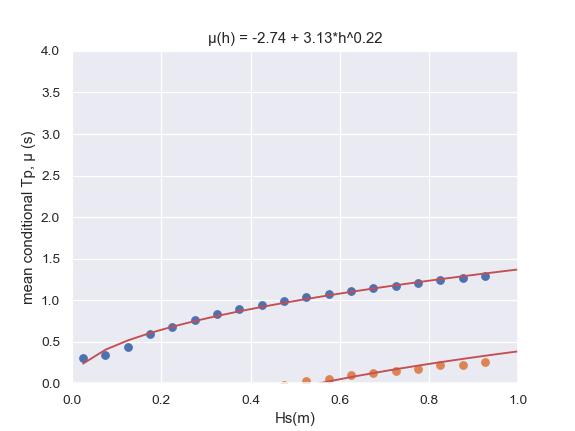

In [101]:
def fit_func_mu(x, a, b, c): return a + b*x**c
mask = np.isfinite(meanTp)
popt_mu, _ =curve_fit(fit_func_mu, x[mask], np.log(meanTp[mask]))

plt.figure('fitting_mean')
plt.plot(x, np.log(meanTp),'o')
plt.plot(x, fit_func_mu(x,*popt_mu), 'r')
plt.xlim([0,1]); plt.ylim([0,4])
plt.xlabel('Hs(m)'); plt.ylabel('mean conditional Tp, μ (s)')
plt.title('μ(h) = {:.2f} + {:.2f}*h^{:.2f}'.format(*popt_mu))
plt.grid(True)

<IPython.core.display.Javascript object>


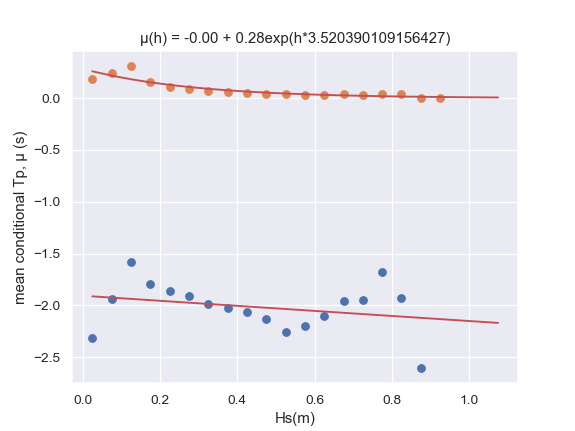

In [103]:
def fit_func_std(x, a, b, c ): return a + b*np.exp(-x*c)
#def fit_func_std(x, a, b, c, d ): return a + b*x+c*x**2+d*x**3 

y = std_Tp
mask = np.isfinite(y)
y = np.log(y)
#x = h
popt_std, _ = curve_fit(fit_func_std, x[mask], y[mask])

plt.figure('fitting_std')
plt.plot(x, y,'o')
plt.plot(x, fit_func_std(x,*popt_std), 'r')
#plt.xlim([0,1]); plt.ylim([0,0.3])
plt.xlabel('Hs(m)'); plt.ylabel('mean conditional Tp, μ (s)')
plt.title('μ(h) = {:.2f} + {:.2f}exp(h*{:})'.format(*popt_std))
plt.grid(True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


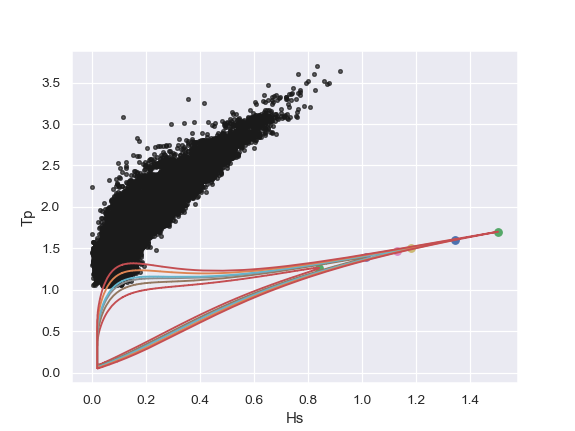

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


Text(0, 0.5, 'Tp')

In [105]:
# Finding h from the script received from LinL

return_period = [1, 10, 50, 100, 1000, 10000]
N_obs = 365*24

return_prob = [1-1/(N_obs*ret_per) for ret_per in return_period]
return_prob = np.array(return_prob)

# compute the exteme values of Hs
exceedance_index = [np.where(F > prob) for prob in return_prob]
exceedance_index = [i[0][0] for i in exceedance_index]
Hs_extremes = Hm_ss[exceedance_index]
Tp_extremes = []

beta = norm.ppf(return_prob, 0, 1)

r = np.arange(0, 2*np.pi, 0.001)

plt.figure('contours')
mask = df.Tp < 17
plt.plot(df.Hs[mask], df.Tp[mask], 'k.', alpha=0.3)
for i, retp in (enumerate(return_period)):
    u1 = beta[i]*np.sin(r)
    u2 = beta[i]*np.cos(r)
    a = norm.cdf(u1, 0, 1)
    exceedance_index = [np.where(F > prob) for prob in a]
    exceedance_index = [i[0][0] for i in exceedance_index]
    h = Hm_ss[exceedance_index]
    u2cdf = norm.cdf(u2, 0, 1)
    #[lognorm.ppf(u2cdf, fit_func_mu(i, *popt_mu), fit_func_std(i, *popt_std)) for i in h]
    t = lognorm.ppf(u2cdf, fit_func_std(h, *popt_std),
                    fit_func_mu(h, *popt_mu))

    # find corresponding value of Tp for exteme Hs
    Tp_extremes.append(t[np.abs(h-Hs_extremes[i]).argmin()])
    plt.plot(Hs_extremes[i], Tp_extremes[-1], 'o')

    plt.plot(h, t)
plt.xlabel('Hs')


plt.ylabel('Tp')

In [47]:
def ff_HsTp(h, a,b, c): return  b*np.exp(c*h)

popt_HsTp, _ = curve_fit(ff_HsTp, Hs_extremes, Tp_extremes)
x = np.arange(0,1.5,0.01)
y = ff_HsTp(x, *popt_HsTp)
plt.figure('contours')
plt.plot(x, y, 'r')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([3.52508119, 3.54147901, 3.55434128, 3.57019302, 3.58258433,
       3.59791802, 3.61298733, 3.6277993 , 3.64236058, 3.65667741,
       3.67075572, 3.6875924 , 3.70118705, 3.71750143, 3.73355193,
       3.74934584, 3.76489002, 3.78019101, 3.795255  , 3.81288612,
       3.8274734 , 3.84459657, 3.86146497, 3.87537346, 3.89177365,
       3.91061122, 3.92652864, 3.94222385, 3.95770253, 3.97556867,
       3.99061422, 4.00802367, 4.02520514, 4.04216498, 4.05890929,
       4.07544391, 4.09177449, 4.10790644, 4.12384502, 4.14203308,
       4.15758659, 4.17537164, 4.19295632, 4.20796444, 4.22517855,
       4.24220834, 4.25905897, 4.27573539, 4.29224243, 4.30858476,
       4.3247669 , 4.34079326, 4.3566681 , 4.37466123, 4.39023553,
       4.40567072, 4.42320629, 4.43836557, 4.45561381, 4.47051269,
       4.48748973, 4.5021429 , 4.51886403, 4.53545833, 4.5497652 ,
       4.56612529, 4.58236934, 4.59635968, 4.61238965, 4.62831356,
       4.64201507, 4.65774362, 4.67337541, 4.68681391, 4.70226

In [77]:
exceedance_index = [np.where(F > prob) for prob in return_prob]
exceedance_index = [i[0][0] for i in exceedance_index]
Hs_extremes = Hm_ss[exceedance_index]
Hs_extremes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([0.983, 1.196, 1.342, 1.404, 1.609, 1.81 ])

In [64]:

return_period=[1, 10, 50, 100, 1000, 10000]
N_obs=365*24

return_prob = [1/(N_obs*ret_per) for ret_per in return_period]
return_prob = np.array(return_prob) 

beta = norm.ppf(return_prob, 0,1)

r = np.arange(0,np.pi, 0.01)

plt.figure('contours')
for i in range(len(beta)):
    u1 = beta[i]*np.sin(r)
    u2 = beta[i]*np.cos(r)
    a = norm.cdf(u1, 0,1) 
    exceedance_index = [np.where(F > prob) for prob in a]
    exceedance_index = [i[0][0] for i in exceedance_index]
    h = Hm_ss[exceedance_index]
    u2cdf = norm.cdf(u2, 0, 1)
    #[lognorm.ppf(u2cdf, fit_func_mu(i, *popt_mu), fit_func_std(i, *popt_std)) for i in h]
    t = lognorm.ppf(u2cdf, fit_func_std(h, *popt_std), fit_func_mu(h, *popt_mu))
    print (sum(np.isfinite(t)))
    #break

    plt.plot(h, t)
plt.xlabel('Hs')

#plt.plot(df.Hs, df.Tp, 'k+')    
plt.ylabel('Tp')

315
315
315
315
315
315


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


Text(44.125, 0.5, 'Tp')

In [55]:
Hm0

array([0.01 , 0.011, 0.012, ..., 3.497, 3.498, 3.499])

In [48]:
list(zip(h,t))

[(0.1249999999999999, 2.2498505952215755),
 (0.1219999999999999, 2.2390090629951063),
 (0.1179999999999999, 2.2244701059387753),
 (0.11499999999999991, 2.213523877664568),
 (0.1119999999999999, 2.202533361545007),
 (0.10799999999999992, 2.187751749110282),
 (0.10499999999999991, 2.176637158078709),
 (0.10199999999999991, 2.1654691093118332),
 (0.09899999999999992, 2.15424445332488),
 (0.09599999999999992, 2.1429598225456634),
 (0.09299999999999993, 2.131611608745947),
 (0.09099999999999993, 2.1241229717823598),
 (0.08799999999999993, 2.1126706245863924),
 (0.08599999999999992, 2.1051298325331067),
 (0.08299999999999993, 2.0935612040507916),
 (0.08099999999999993, 2.08595967153718),
 (0.07799999999999994, 2.0742609091278386),
 (0.07599999999999994, 2.066588805025881),
 (0.07399999999999994, 2.0588917886375717),
 (0.07199999999999994, 2.0511679516233334),
 (0.06999999999999995, 2.0434152636419767),
 (0.06799999999999995, 2.0356315607184827),
 (0.06599999999999995, 2.027814532144581),
 (0

<IPython.core.display.Javascript object>


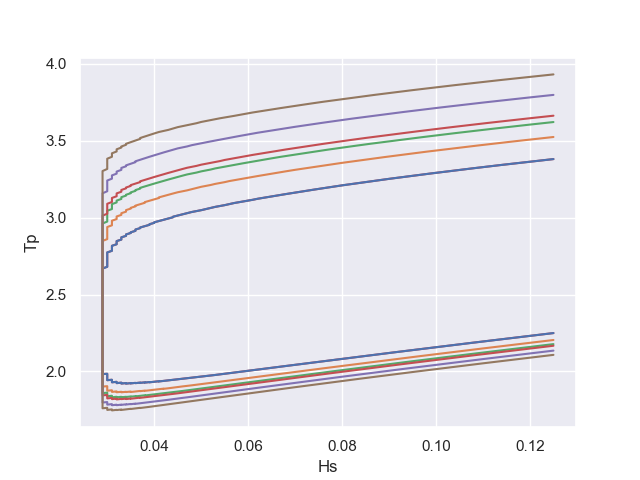

In [50]:
plt.figure('test')
plt.plot(h,t, 'r')

In [52]:
u1, u2

(array([-0.        , -0.03685376, -0.07370383, -0.11054653, -0.14737817,
        -0.18419508, -0.22099357, -0.25776996, -0.29452057, -0.33124174,
        -0.36792977, -0.40458102, -0.44119181, -0.47775847, -0.51427737,
        -0.55074483, -0.58715722, -0.6235109 , -0.65980222, -0.69602757,
        -0.73218331, -0.76826584, -0.80427154, -0.84019681, -0.87603807,
        -0.91179172, -0.94745419, -0.98302192, -1.01849135, -1.05385893,
        -1.08912112, -1.1242744 , -1.15931526, -1.19424019, -1.22904569,
        -1.26372829, -1.29828451, -1.33271091, -1.36700404, -1.40116047,
        -1.43517679, -1.46904959, -1.50277548, -1.5363511 , -1.56977309,
        -1.6030381 , -1.63614281, -1.6690839 , -1.70185809, -1.73446209,
        -1.76689265, -1.79914652, -1.83122047, -1.86311131, -1.89481584,
        -1.92633088, -1.9576533 , -1.98877995, -2.01970773, -2.05043353,
        -2.0809543 , -2.11126697, -2.14136851, -2.17125592, -2.20092621,
        -2.23037641, -2.25960357, -2.28860477, -2.3

In [ ]:
aaaa
    

In [62]:
df.describe()

Hs             Tp           Wdir
count  134376.000000  134020.000000  134376.000000
mean        0.138890       1.596321     221.300262
std         0.102054       0.382151      79.430862
min         0.000000       1.049074       0.076904
25%         0.066378       1.338999     162.437820
50%         0.104527       1.438185     171.210663
75%         0.183111       1.771599     327.567383
max         0.917845      17.308573     359.983521

In [ ]:
##### DUPLICATE!!!!###############


def weibulEVC(hm_data, return_period=[1, 10, 50, 100, 10000.0], tag='South', N_obs=365*24):

    # probablity distribution curve parameters, lamda, alpha, beta.
    lambd, alpha, beta = weib3pfit(hm_data)

    # sample space of the max wave height. discretized to every mm
    # sample space for the probablity, Hm_ss
    # max limit of sample space, Hm_ss_max, set to 4times. Arbitarily.
    # This is set up to be able to estimate high enough return periods
    Hm_ss_max = (int(np.max(hm_data)*4*2)+1)/2
    # print(Hm_ss_max)
    Hm_ss = np.arange(0.01, Hm_ss_max, 0.001)

    # sample space for probabilty of occurance
    prob_ss = np.arange(len(hm_data))/len(hm_data)

    # cumulative probablity, F
    # an absolute value Hm_ss and lambda can be taken so as to ensure positive
    # value at low values of Hm_ss but this gives an unrealistically decreasing tail.
    #F = 1 - np.exp(-(np.abs(Hm_ss - lambd)/alpha)**beta)
    F = 1 - np.exp(-((Hm_ss - lambd)/alpha)**beta)

    '''
    uncomment to plot cumulative probablity against Hs sample space
    plt.close()
    plt.plot(Hm_ss, F)
    plt.show()
    '''

    #return_period = [1, 10, 50, 100, 10000.0] in years
    # number of observations in a period [month, yearly]
    # for a year N_obs = 365*24
    # probablitiy of exedance. what is the probablity of exceedence for 1, 10, 50yrs...
    return_prob = [1-1/(N_obs*ret_per) for ret_per in return_period]
    return_prob = np.array(return_prob)

    # Find the index where the exceedence probablity if exeeded.
    exceedance_index = [np.where(F > prob) for prob in return_prob]
    exceedance_index = [i[0][0] for i in exceedance_index]

    # Find exceedance values of Hs
    Hm_extremes = Hm_ss[exceedance_index]

    # plotting
    plt.figure('EVC_'+tag)
    plt.ioff
    # plot sorted log Hs vs log log probabilty space
    plt.plot(np.log(np.sort(hm_data)), np.log(-np.log(1-prob_ss)), '+b')
    # todo check if np.log(prob_ss) gives the same plot.
    # plot Hm sample space vs weibull curve
    plt.plot(np.log(Hm_ss), np.log(-np.log(1-F)), 'r', lw=2.0)

    # plot extreme values vs, return period
    for x, y in zip(Hm_extremes, return_prob):
        plt.plot(np.log(x), np.log(-np.log(1-y)), 'o')
    plt.grid(True)
    legend = ['Data', 'Weibull 3p']
    _leg = ['{}yr    Hm={}cm'.format(a, b) for a, b in zip(
        return_period, np.round(Hm_extremes*100, 2))]
    legend += _leg
    #plt.axis([-5, 2, -7, 4])
    plt.legend(legend)
    plt.title('Weibull 3p EVC {} ($α=${:.2f}, $β=${:.2f}, $λ=${:.2f})'.format(
        tag, alpha, beta, lambd))
    plt.xlabel('log(Wave height)', fontsize=10)
    plt.ylabel('$log(-log(Probablity))$', fontsize=10)
    ts = pd.to_datetime('now').strftime("%Y%m%d_%H%M%S")
    plt.savefig('./fig/'+tag+ts+'.png', dpi=300)
    plt.show()
    plt.close()

In [ ]:
def maskedlogmean(a): return np.mean(np.ma.log(np.array(a)))


In [ ]:
df[df.Hs>]

In [ ]:
joint_distribution.loc[rows[0]]

In [ ]:
a, maaaaaaaaaa = blockHscount(df, 0, 0.4)
m, a

In [ ]:
df.Tp.hist(bins = np.arange(0, 4.2, 0.2))

In [ ]:
df[df.Tp<1]

In [ ]:
h, t, delH, delT = 1, 0, 4,20
m = df[((df['Hs'] > h) & (df['Hs'] <= h+delH)) &
           ((df['Tp'] > t) & (df['Tp'] <= t+delT))]
m.head()

There is this frequency around 17s which gives a lot of 0 values for Hs.probably error

In [ ]:
df[df.Tp>3.5]

In [ ]:
'{} to {}'.format(i, i+0.1)

In [ ]:
df[((df['Hs'] > h) & (df['Hs'] <= h+delH)) &
           ((df['Tp'] > t) & (df['Tp'] <= t+delT))]

In [ ]:
occurances_south = np.array([])
df = df_south
for h in np.arange(0, 1, 0.1):
    row = []
    for t in range(0, 20):
        mask = df[((df['Hs'] > h) & (df['Hs'] <= h+0.1)) &
                  ((df['Tp'] > t) & (df['Tp'] <= t+1))]

        row.append(mask.Hs.count())

    print(row)
    np.concatenate(occurances_south, row)
occurances_south

In [ ]:
h, t =0,0
mask = df_south[((df['Hs'] > h) & (df['Hs'] <= h+0.1)) &
                        ((df['Tp'] > t) & (df['Tp'] <= t+1))]
mask.head()

In [ ]:
df.describe()

In [ ]:
np.concatenate(([],[1,2],[2,3]))

In [ ]:
a  = np.array([1,2,3])
b  = np.array([5,6,7])
np.vstack((b,a,b))

In [ ]:
test = df_south.copy()

In [ ]:
test.between_time('2007','2008')

In [ ]:
np.vstack(([], [1,2]))

In [ ]:
for hrange in range(0.,5)

In [ ]:
260*6*140

In [ ]:
hm0y[hm0y.index<2017]

In [ ]:
a = df_south.copy()

In [ ]:

a['Hs'].resample('A').max(), a['Hs'].resample('AS').max(), a.groupby(a.index.year)['Hs'].max()

In [ ]:
prin(meh)

In [ ]:



print(lambd, alpha, beta)

In [ ]:
Hm_extremes = Hm_ss[exceedance_index]
Hm_extremes

return extreme values for sample space up to 2,5m
array([0.841, 1.014, 1.132, 1.182, 1.505])
return extreme values for sample space up to 3,5m
array([0.841, 1.014, 1.132, 1.182, 1.505])

upper limit of Hm sample space had no effect on result. thats good. 

In [ ]:

prob_ss[:10], prob_ss[-10:]

In [ ]:
import seaborn
seaborn.set()

In [ ]:
# plotting
plt.figure('EVC')
plt.plot(np.log(np.sort(hm_data)), np.log(-np.log(1-prob_ss)),'+b')
plt.plot(np.log(Hm_ss),np.log(-np.log(1-F)),'r',lw=2.0)

for x, y in zip(Hm_extremes, return_prob):
    plt.plot(np.log(x),np.log(-np.log(1-y)),'o')
plt.grid(True)
legend = ['Data', 'Weibull 3p']
_leg = ['{}yr    Hm={}cm'.format(a, b) for a, b in zip(
    return_period, np.round(Hm_extremes*100,2))]
legend += _leg
plt.axis([-5,2,-7,4])
plt.legend(legend)
plt.title('weibul 3p EVC ($α=${:.2f}, $β=${:.2f}, $λ=${:.2f})'.format(alpha, beta, lambd))


TODO: 

spearate by month. 

and 4 months.
same for mid crossing. 
$\alpha$
Gumble.

In [ ]:
_leg = ['{}yr \t Hm={}cm'.format(a, b) for a, b in zip(
    return_period, np.round(Hm_extremes*100,2))]
legend+_leg

In [ ]:
np.max(return_prob) - np.max(F)

In [ ]:

N_yearly_obs, len(hm_data['2004']), hm_data['2004'][:15]

In [ ]:
N = 20
Hm_ss[:N], F[:N], F[-15:]

In [ ]:
(Hm_ss[18]-lambd)/alpha

In [ ]:
F[-5]-F[-4] 

In [ ]:
x = np.arange(0,1,0.01)
y = gamma(x)
plt.plot(x, y)
plt.plot([1,0,0], [0,0,100],'r')

In [ ]:
Hm0 = np.arange(0.01, 0.80, 0.001)
hm0 =df_south['Hs']

import warnings
warnings.filterwarnings('error')

In [ ]:
lambd, alpha, beta = weib3pfit(hm0)
print(lambd, alpha, beta)

In [ ]:

lambd, alpha, beta = weib3pfit(hm0)
print(lambd, alpha, beta)


In [ ]:
y1

In [ ]:
F1 = 1-np.exp(-((Hm0-lambd)/alpha)**beta)
p = prob(hm0)
p[:5], F1[:5]

In [ ]:
pn[:5], F1[:15], np.nanmean(pn), np.nanmean(F1)

In [ ]:
return_period = [1, 10, 50, 100, 10000.]
Yearly_sample_rate = 8760
pn = [1- 1./rp/Yearly_sample_rate for rp in return_period ]
print(p, pn)
i1 = np.where(abs(pn[0]-F1) < 0.000005)
x1 = Hm0[i1[0][0]]
i2 = np.where(abs(pn[1]-F1) < 0.000001)
x2 = Hm0[i2[0][0]]
i3 = np.where(abs(pn[2]-F1) < 0.0000001)
x3 = Hm0[i3[0][0]]
i4 = np.where(abs(pn[3]-F1) < 0.00000005)
x4 = Hm0[i4[0][0]]
i5 = np.where(abs(pn[4]-F1) < 0.0000000005)
x5 = Hm0[i5[0][0]]

In [ ]:
i1 = np.where(pn[0]> F1)
i1, pn[0], F1, pn

In [ ]:
Hs_sample_space 

In [ ]:
%debug
Hm0 = np.arange(0.01, 0.80, 0.001)
hm0 =df_south['Hs']

lambd, alpha, beta = weib3pfit(hm0)
print(lambd, alpha, beta)

F1 = 1-np.exp(-((Hm0-lambd)/alpha)**beta)
p = prob(hm0)

#pn = [1.-1./(2920.), 1.-1./(10.*2920.), 1.-1./(50.*2920.),
      1.-1./(100.*2920.), 1.-1./(10000.*2920.)]

return_period = [1, 10, 50, 100, 10000.]
pn = [1- 1./rp/len(hm0) for rp in return_period ]
print(p, pn)
i1 = np.where(abs(pn[0]-F1) < 0.000005)
x1 = Hm0[i1[0][0]]
i2 = np.where(abs(pn[1]-F1) < 0.000001)
x2 = Hm0[i2[0][0]]
i3 = np.where(abs(pn[2]-F1) < 0.0000001)
x3 = Hm0[i3[0][0]]
i4 = np.where(abs(pn[3]-F1) < 0.00000005)
x4 = Hm0[i4[0][0]]
i5 = np.where(abs(pn[4]-F1) < 0.0000000005)
x5 = Hm0[i5[0][0]]

plt.figure(5)
plt.plot(np.log(np.sort(hm0)), np.log(-np.log(1-p)), '+b')
plt.plot(np.log(Hm0), np.log(-np.log(1-F1)), 'r', lw=2.0)
plt.plot(np.log(x1), np.log(-np.log(1-pn[0])), 'oc')
plt.plot(np.log(x2), np.log(-np.log(1-pn[1])), 'oy')
plt.plot(np.log(x3), np.log(-np.log(1-pn[2])), 'og')
plt.plot(np.log(x4), np.log(-np.log(1-pn[3])), 'om')
plt.plot(np.log(x5), np.log(-np.log(1-pn[4])), 'ok')
plt.grid(True)
plt.legend(['Data', '3p Weibull', '1yr,          Hm0='+str(np.round(x1, 2))+'m', '10yr,        Hm0='+str(np.round(x2, 2))+'m',
            '50yr,        Hm0='+str(np.round(x3, 2))+'m', '100yr,      Hm0='+str(np.round(x4, 2))+'m', '10 000yr, Hm0='+str(np.round(x5, 2))+'m'])

In [ ]:
np.max(df_south['Hs'][:10])

In [ ]:
hm0 =df_south['Hs']

lambd, alpha, beta = weib3pfit(hm0)

In [ ]:
lambd, alpha, beta

In [ ]:
F1

In [ ]:
pd.to_datetime(df_mid.index, unit='s')

In [ ]:
nc['time'][:].data +1 aaa


In [ ]:
from datetime import datetime

In [ ]:
datetime.utcfromtimestamp(nc['time'][0])

In [ ]:
time_epoch = nc['time'][:]
np.datetime64(time_epoch[0], 's')

In [ ]:
from datetime import timezone
datetime.fromtimestamp(time_epoch[5], timezone.utc)

In [ ]:
nc['longitude'][:]

In [ ]:
for i in nc.variables:
    print (i, len(nc[i]))

In [ ]:

nc.variables

In [ ]:
296*373

In [ ]:
8760/365/24

In [ ]:
a = nc['longitude']
len(a)

In [ ]:
a.mask

In [ ]:
a